In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.cm as cm
import imageio
from IPython.display import HTML
import cmath

from pylab import rcParams
rcParams['figure.figsize'] = 14, 11
matplotlib.rc('font', **{'size': 20})

In [2]:
def show_julia_map(x_size, y_size, c, iterations, z_max=10, fraction=2):
    img = np.zeros((y_size, x_size))

    # abs(z) < 2
    xmin, xmax = -2, 2
    ymin, ymax = -2, 2
    xwidth = xmax - xmin
    yheight = ymax - ymin

    for x in range(x_size):
        for y in range(y_size):
            z = complex(x / x_size * xwidth + xmin, y / y_size * yheight + ymin)
            iter_num = 0

            while abs(z) <= z_max and iter_num < iterations:
                z = z**fraction + c
                iter_num += 1

            img[x, y] = iter_num / iterations

    fig, ax = plt.subplots()
    ax.set_xlabel('RE(z)')
    ax.set_ylabel('Im(z)')

    ax.set_xticks([int(i / 4 * x_size) for i in np.arange(-2, 2, 8)])
    ax.set_yticks([int(i / 4 * y_size) for i in np.arange(-2, 2, 8)])

    ax.set_xticklabels(np.arange(-2, 2, 8))
    ax.set_yticklabels(np.arange(-2, 2, 8))

    ax.imshow(img, cmap=cm.hot)
#     ax.imshow(img, cmap=cm.binary)


I have found explanation and some parameters here: https://en.wikipedia.org/wiki/Julia_set

##Julian set

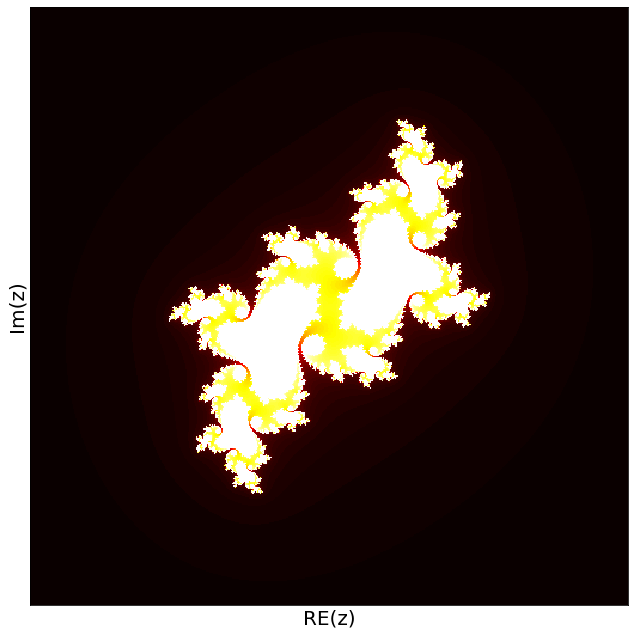

In [56]:
show_julia_map(x_size=500, y_size=500, c=complex(-0.1, 0.65), iterations=100, z_max=10, fraction=2)

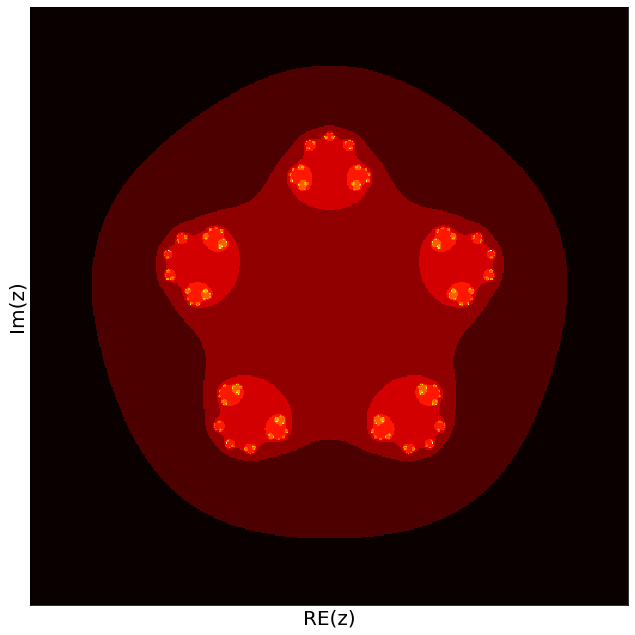

In [57]:
show_julia_map(x_size=500, y_size=500, c=complex(1, 0), iterations=100, z_max=10, fraction=5)

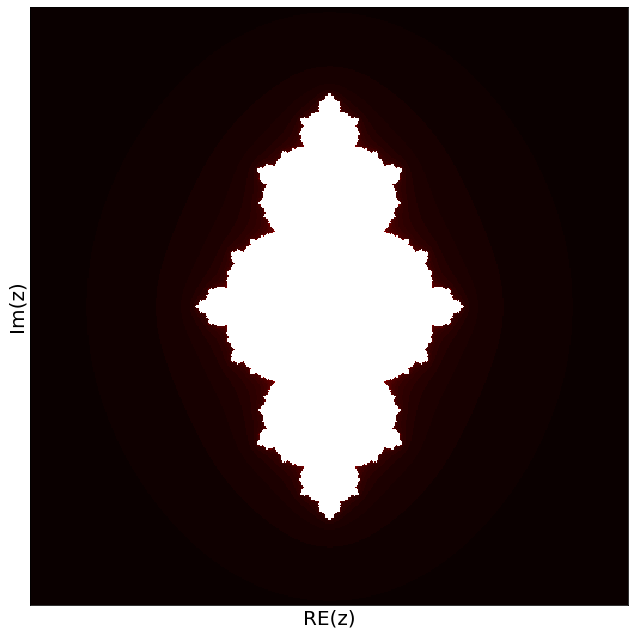

In [39]:
show_julia_map(x_size=500, y_size=500, c=1-1.61803398, iterations=100, z_max=10, fraction=2)

In [3]:
def show_julia_iterations(x_size, y_size, c, iterations, z_max=10, fraction=2, file_name='julia_iterations'):
    img = np.zeros((y_size, x_size))

    # abs(z) < 2
    xmin, xmax = -2, 2
    ymin, ymax = -2, 2
    xwidth = xmax - xmin
    yheight = ymax - ymin

    for x in range(x_size):
        for y in range(y_size):
            z = complex(x / x_size * xwidth + xmin, y / y_size * yheight + ymin)
            iter_num = 0

            while abs(z) <= z_max and iter_num < iterations:
                z = z**fraction + c
                iter_num += 1
            
            img[x, y] = iter_num
    
    with imageio.get_writer('./data/' + file_name + '.gif', mode='I') as writer:
        for i in range(iterations):      
            mask = img > i

            fig, ax = plt.subplots()
            ax.set_xlabel('RE(z)')
            ax.set_ylabel('Im(z)')
            plt.text(5, 15, 'iteration: ' + str(i), fontsize=20, color='red')
            
            ax.set_xticks([int(i / 4 * x_size) for i in np.arange(-2, 2, 8)])
            ax.set_yticks([int(i / 4 * y_size) for i in np.arange(-2, 2, 8)])

            ax.set_xticklabels(np.arange(-2, 2, 8))
            ax.set_yticklabels(np.arange(-2, 2, 8))

#             plt.axis('off')
            plt.imsave('./data/' + file_name + '.jpg', mask, cmap=cm.binary)
            writer.append_data(imageio.imread('./data/' + file_name + '.jpg'))

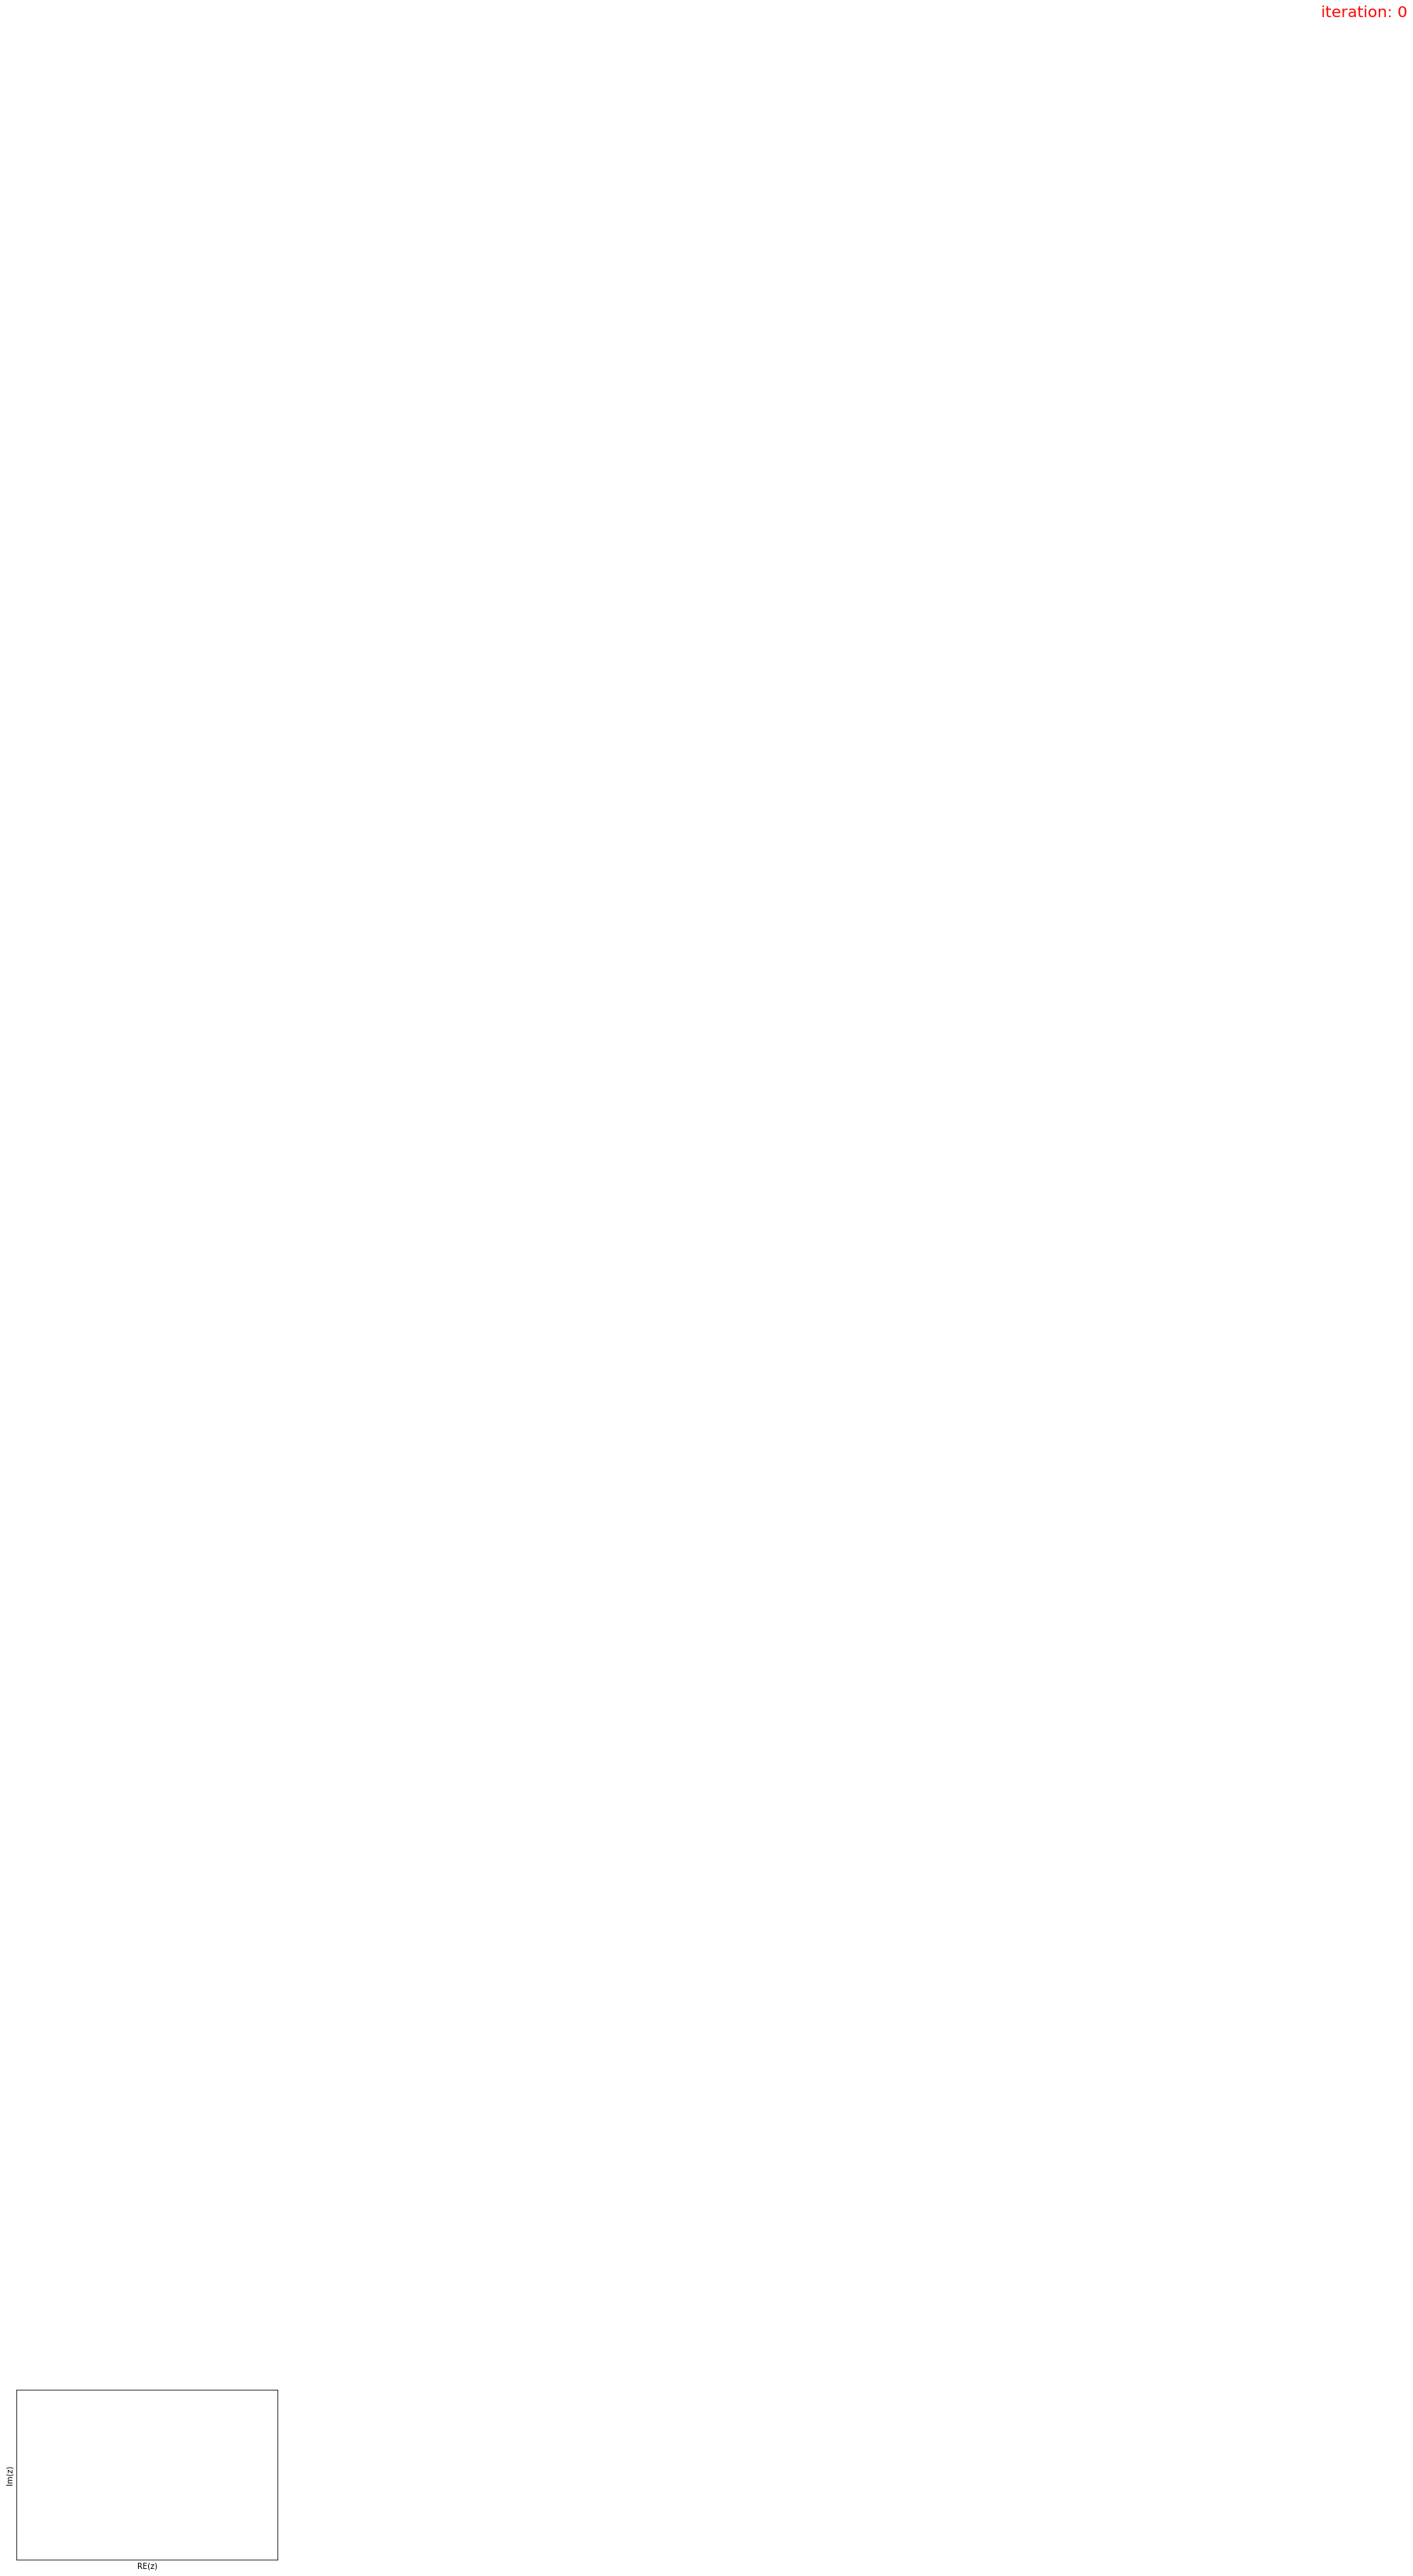

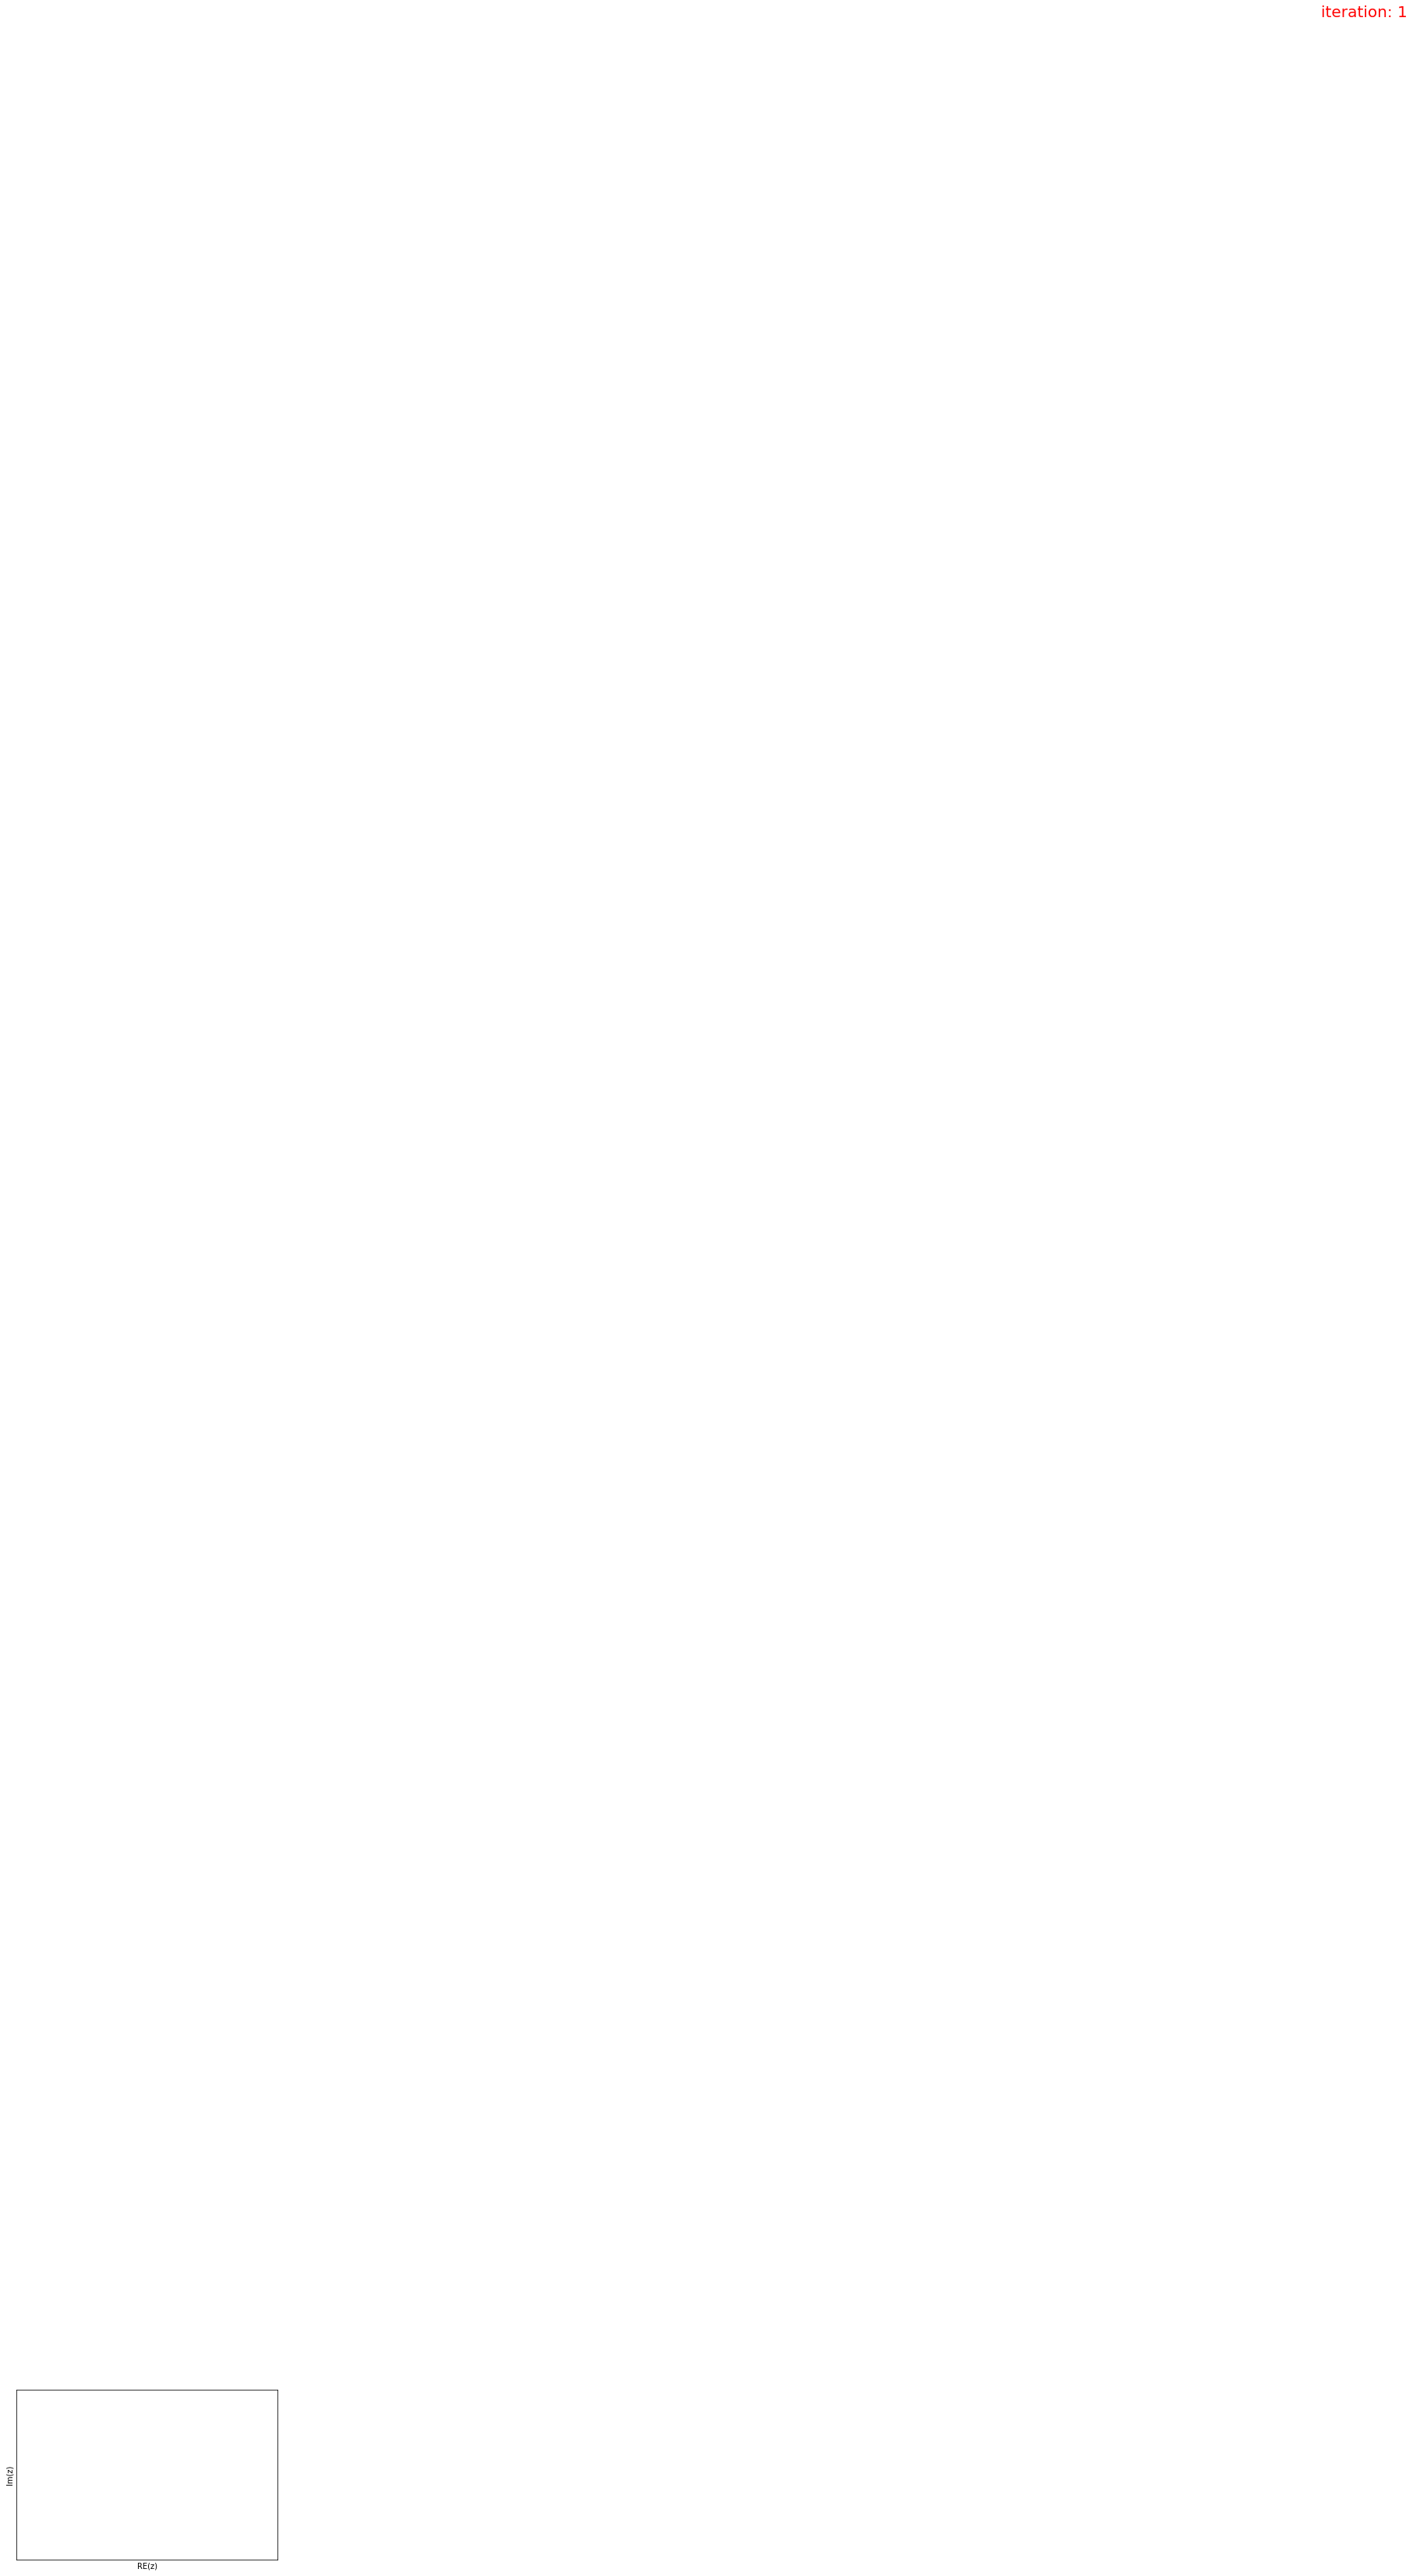

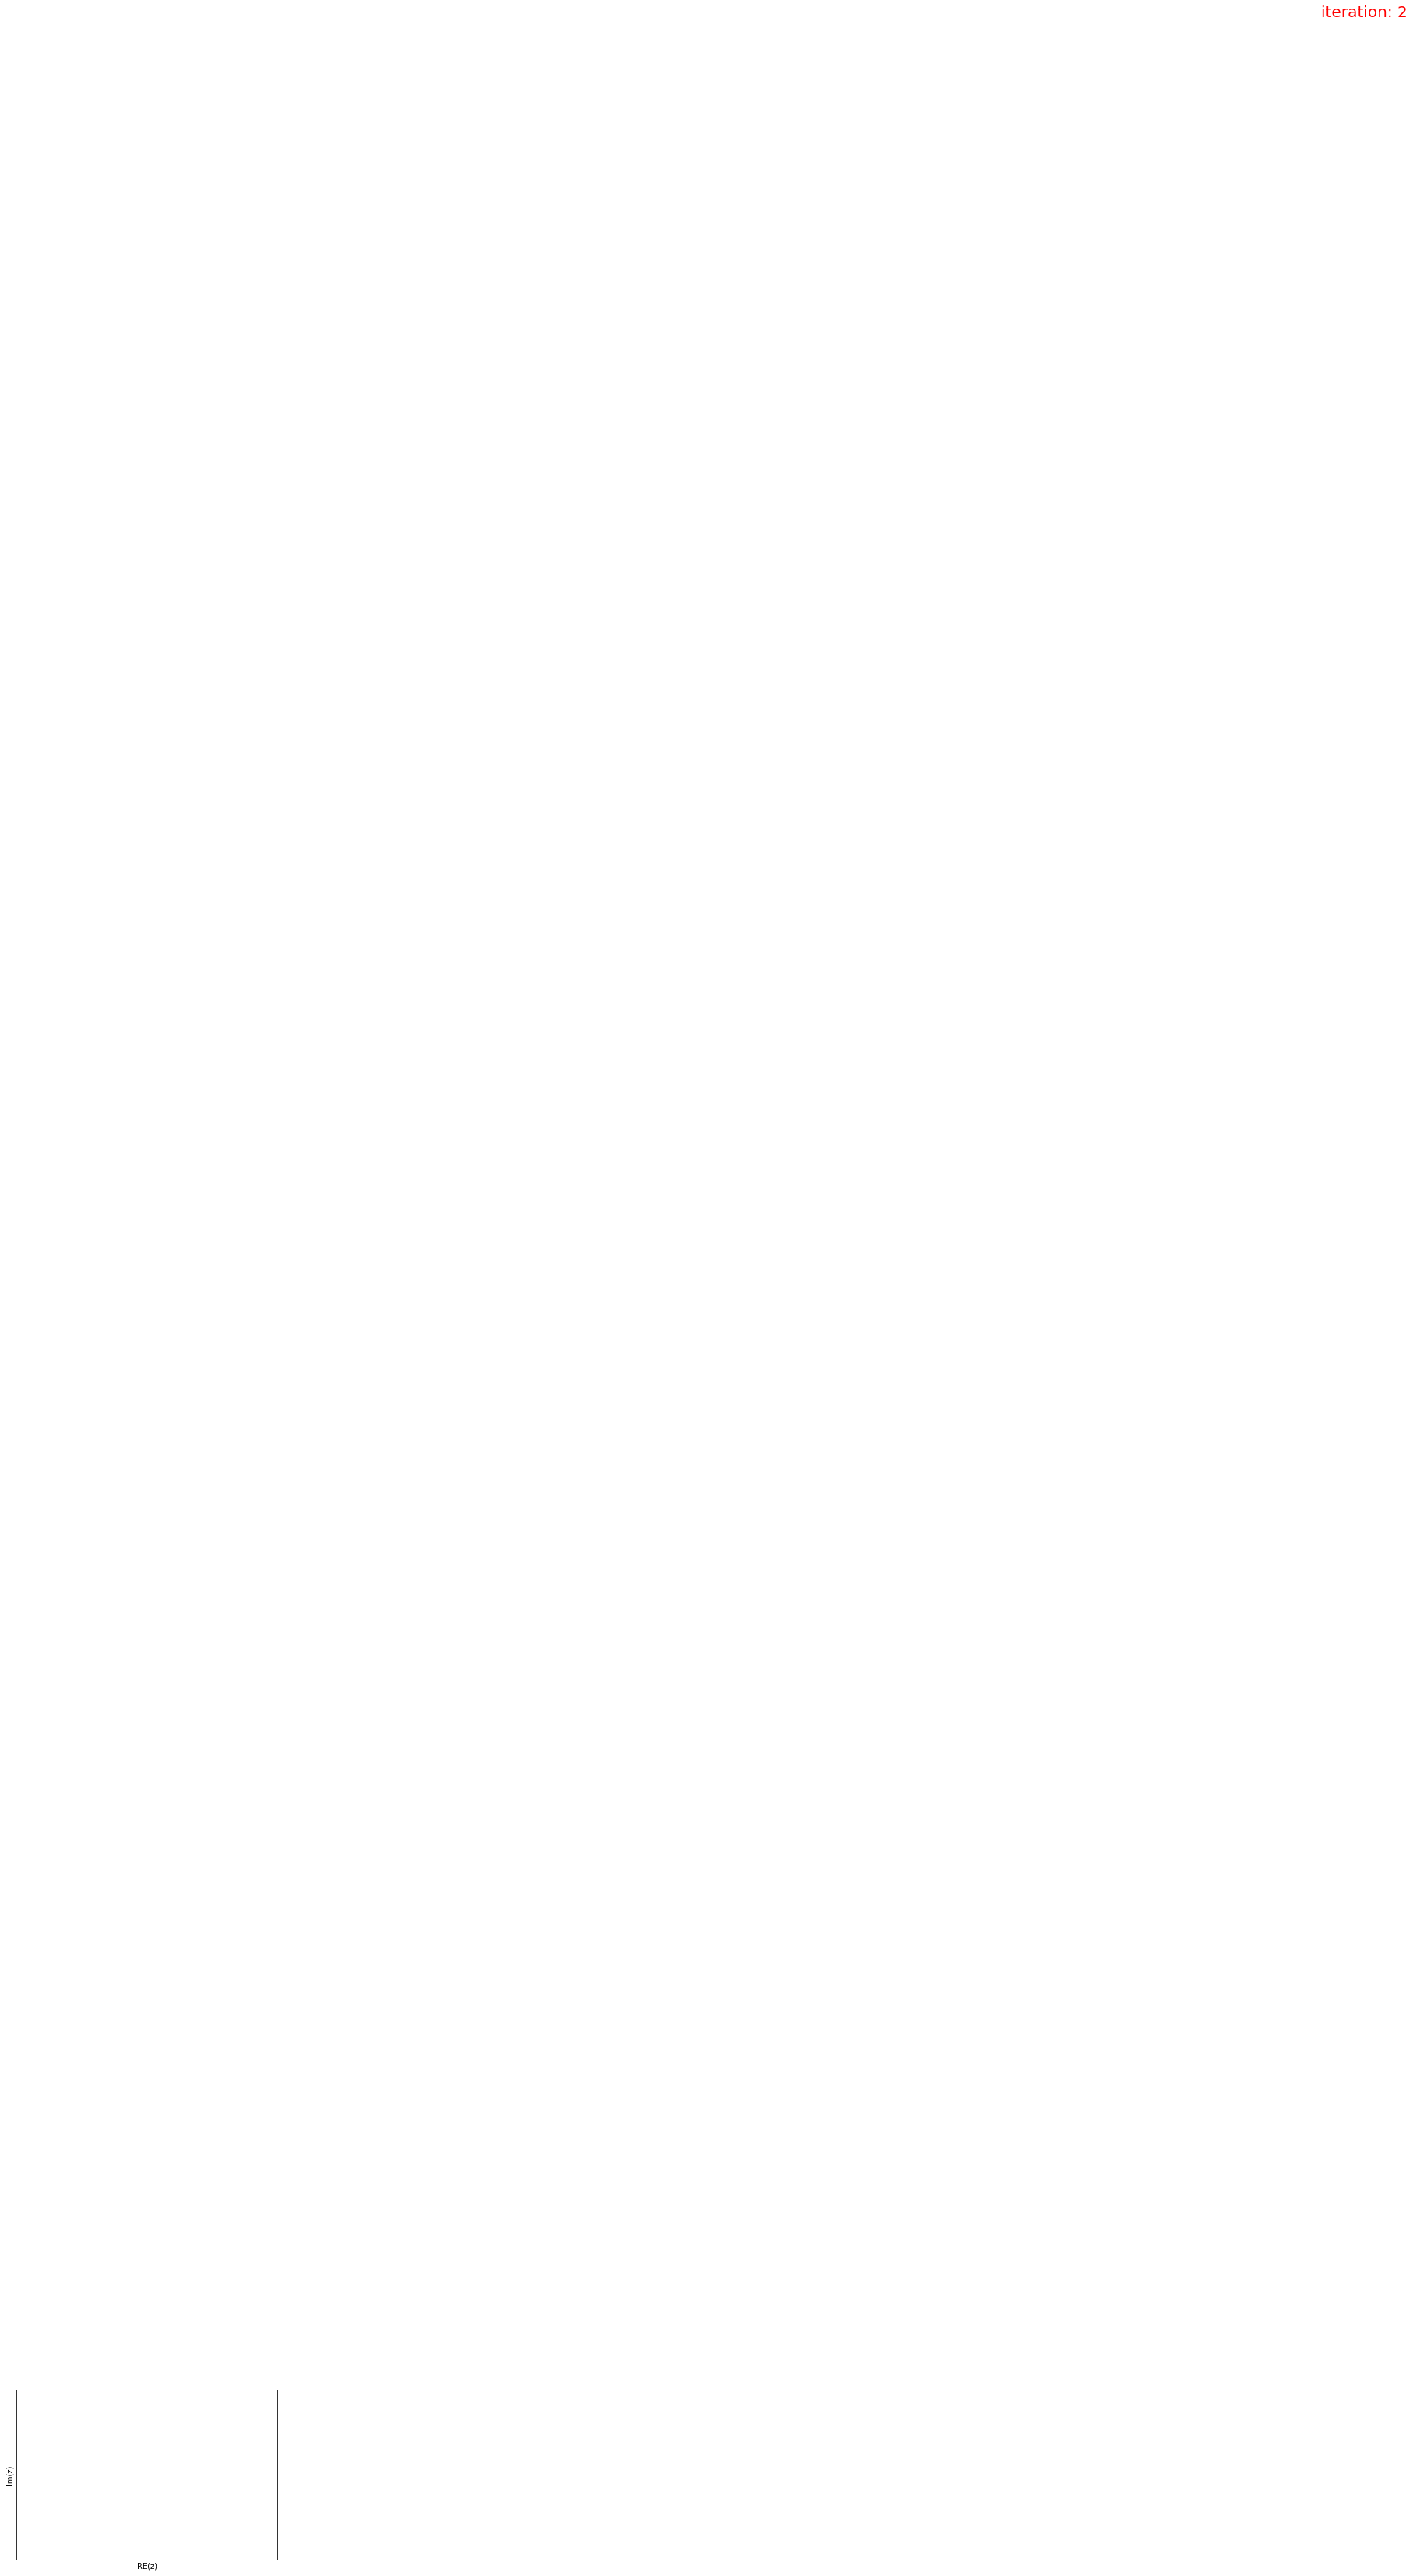

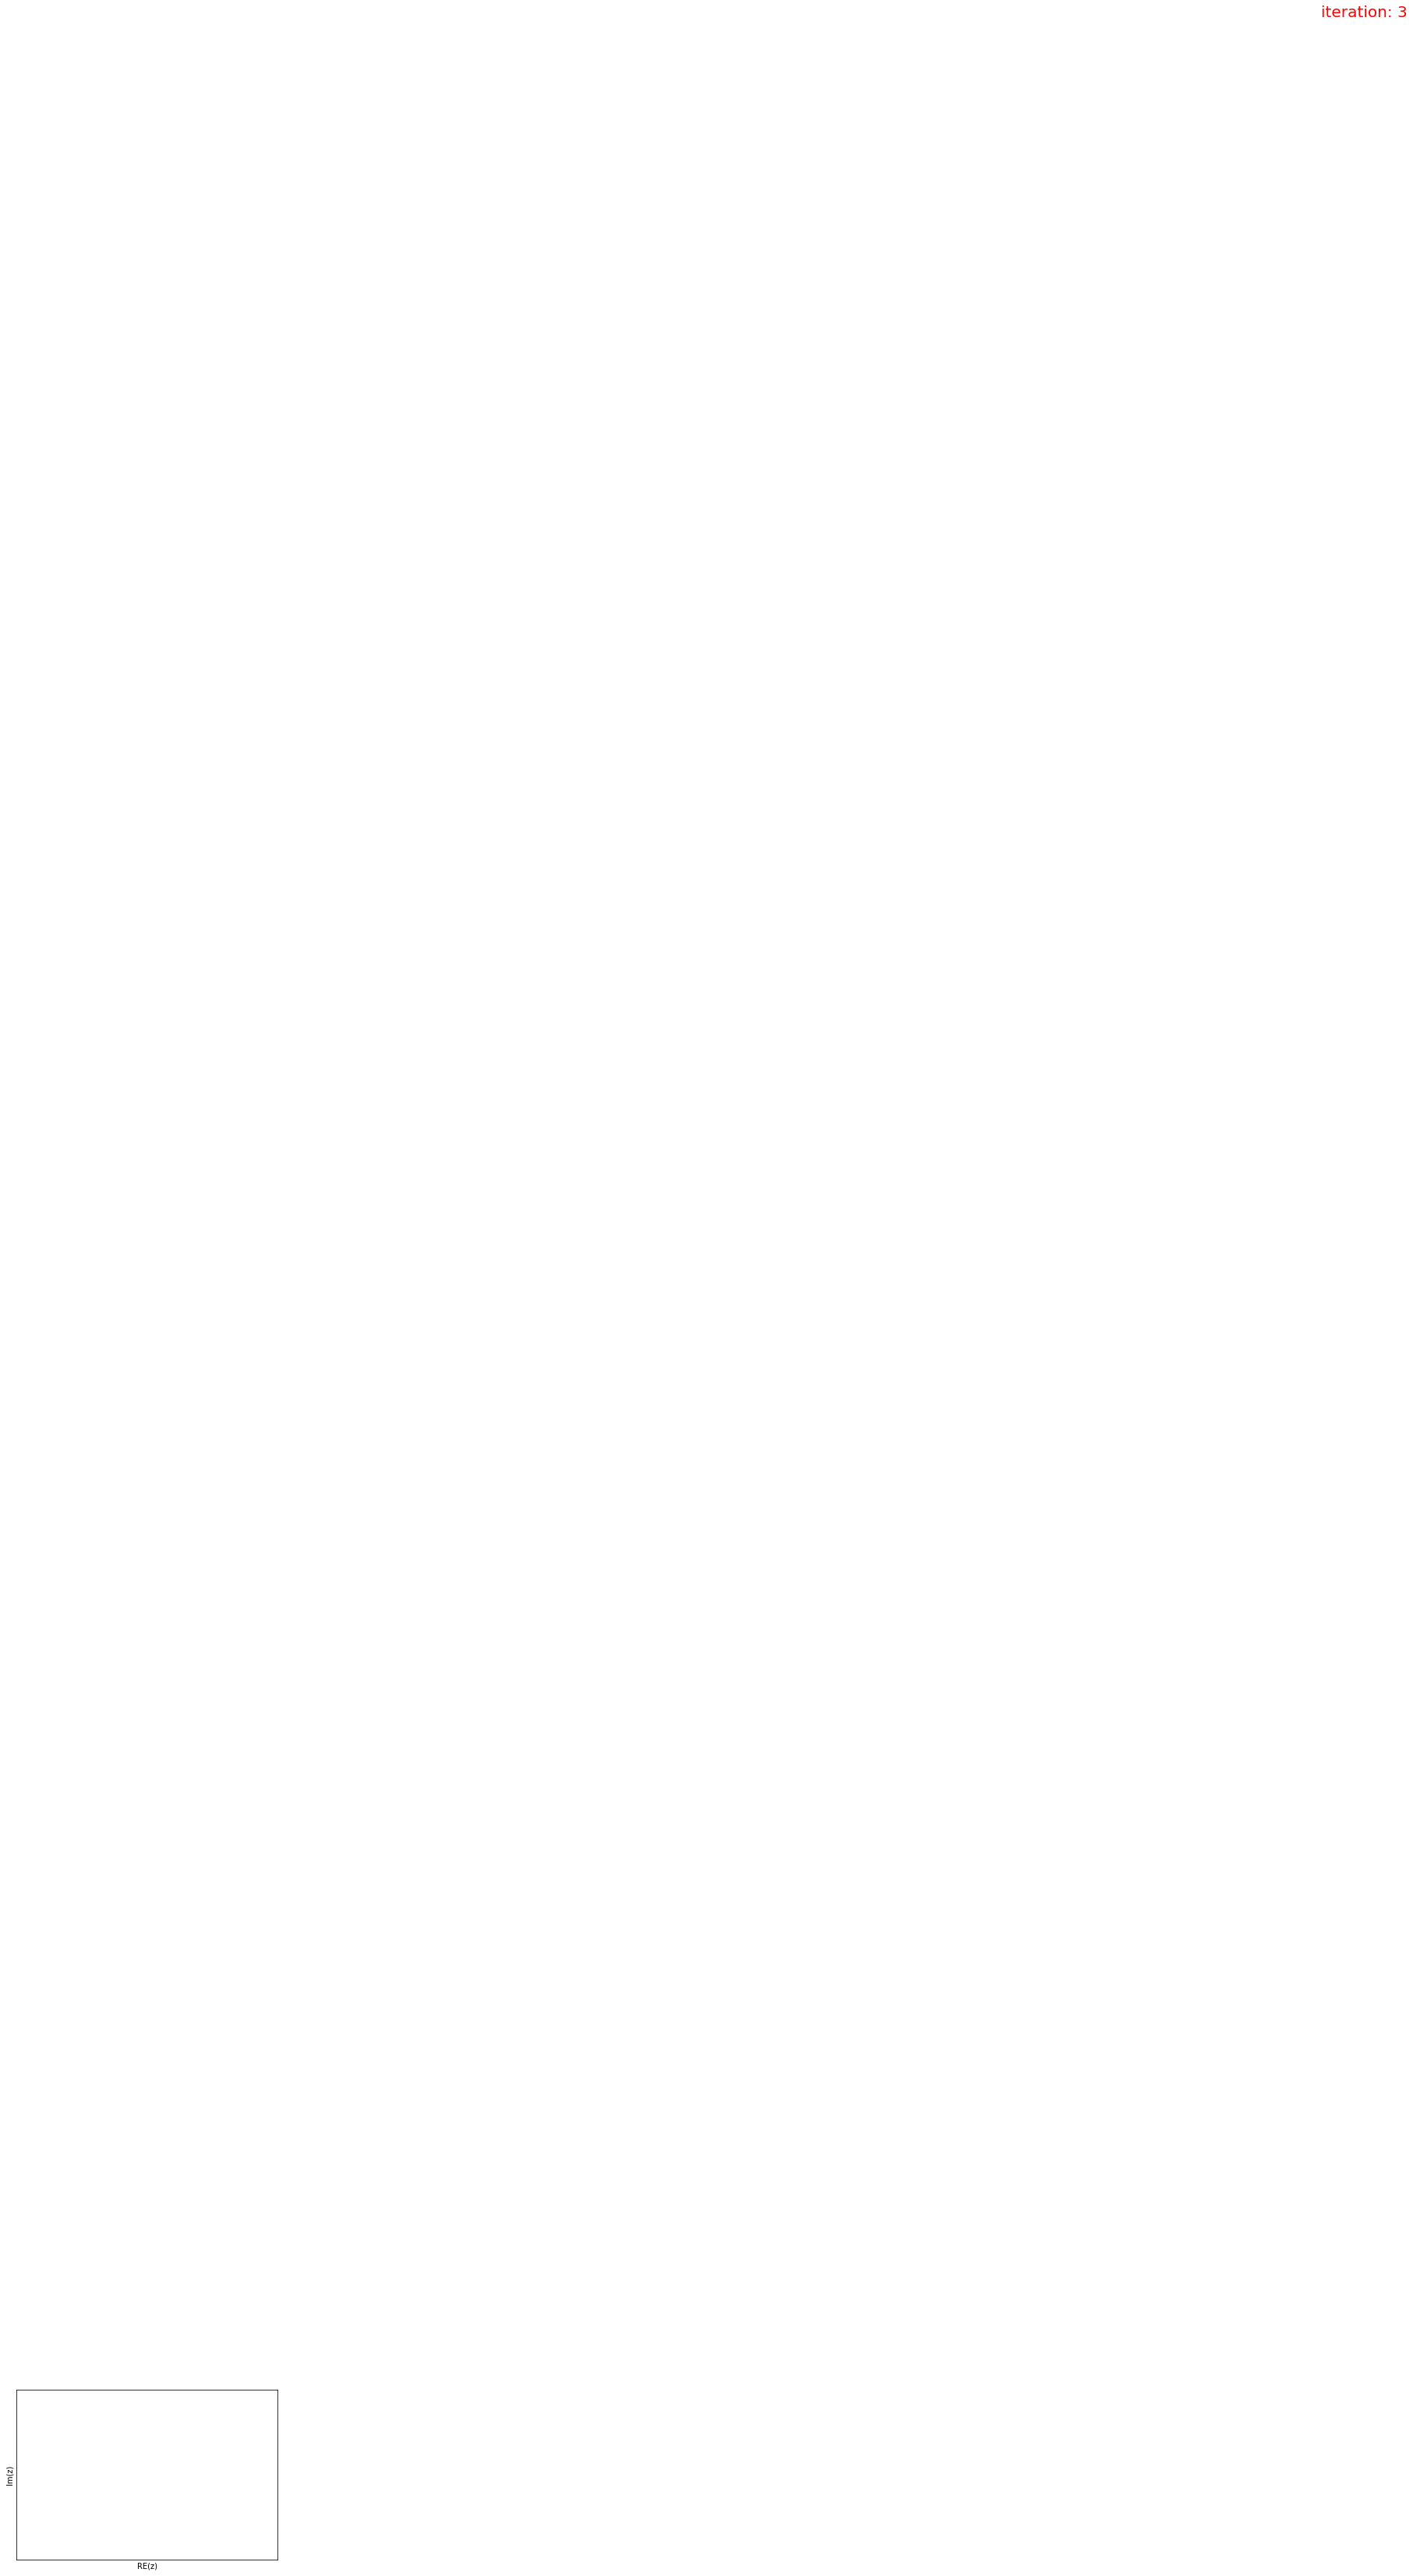

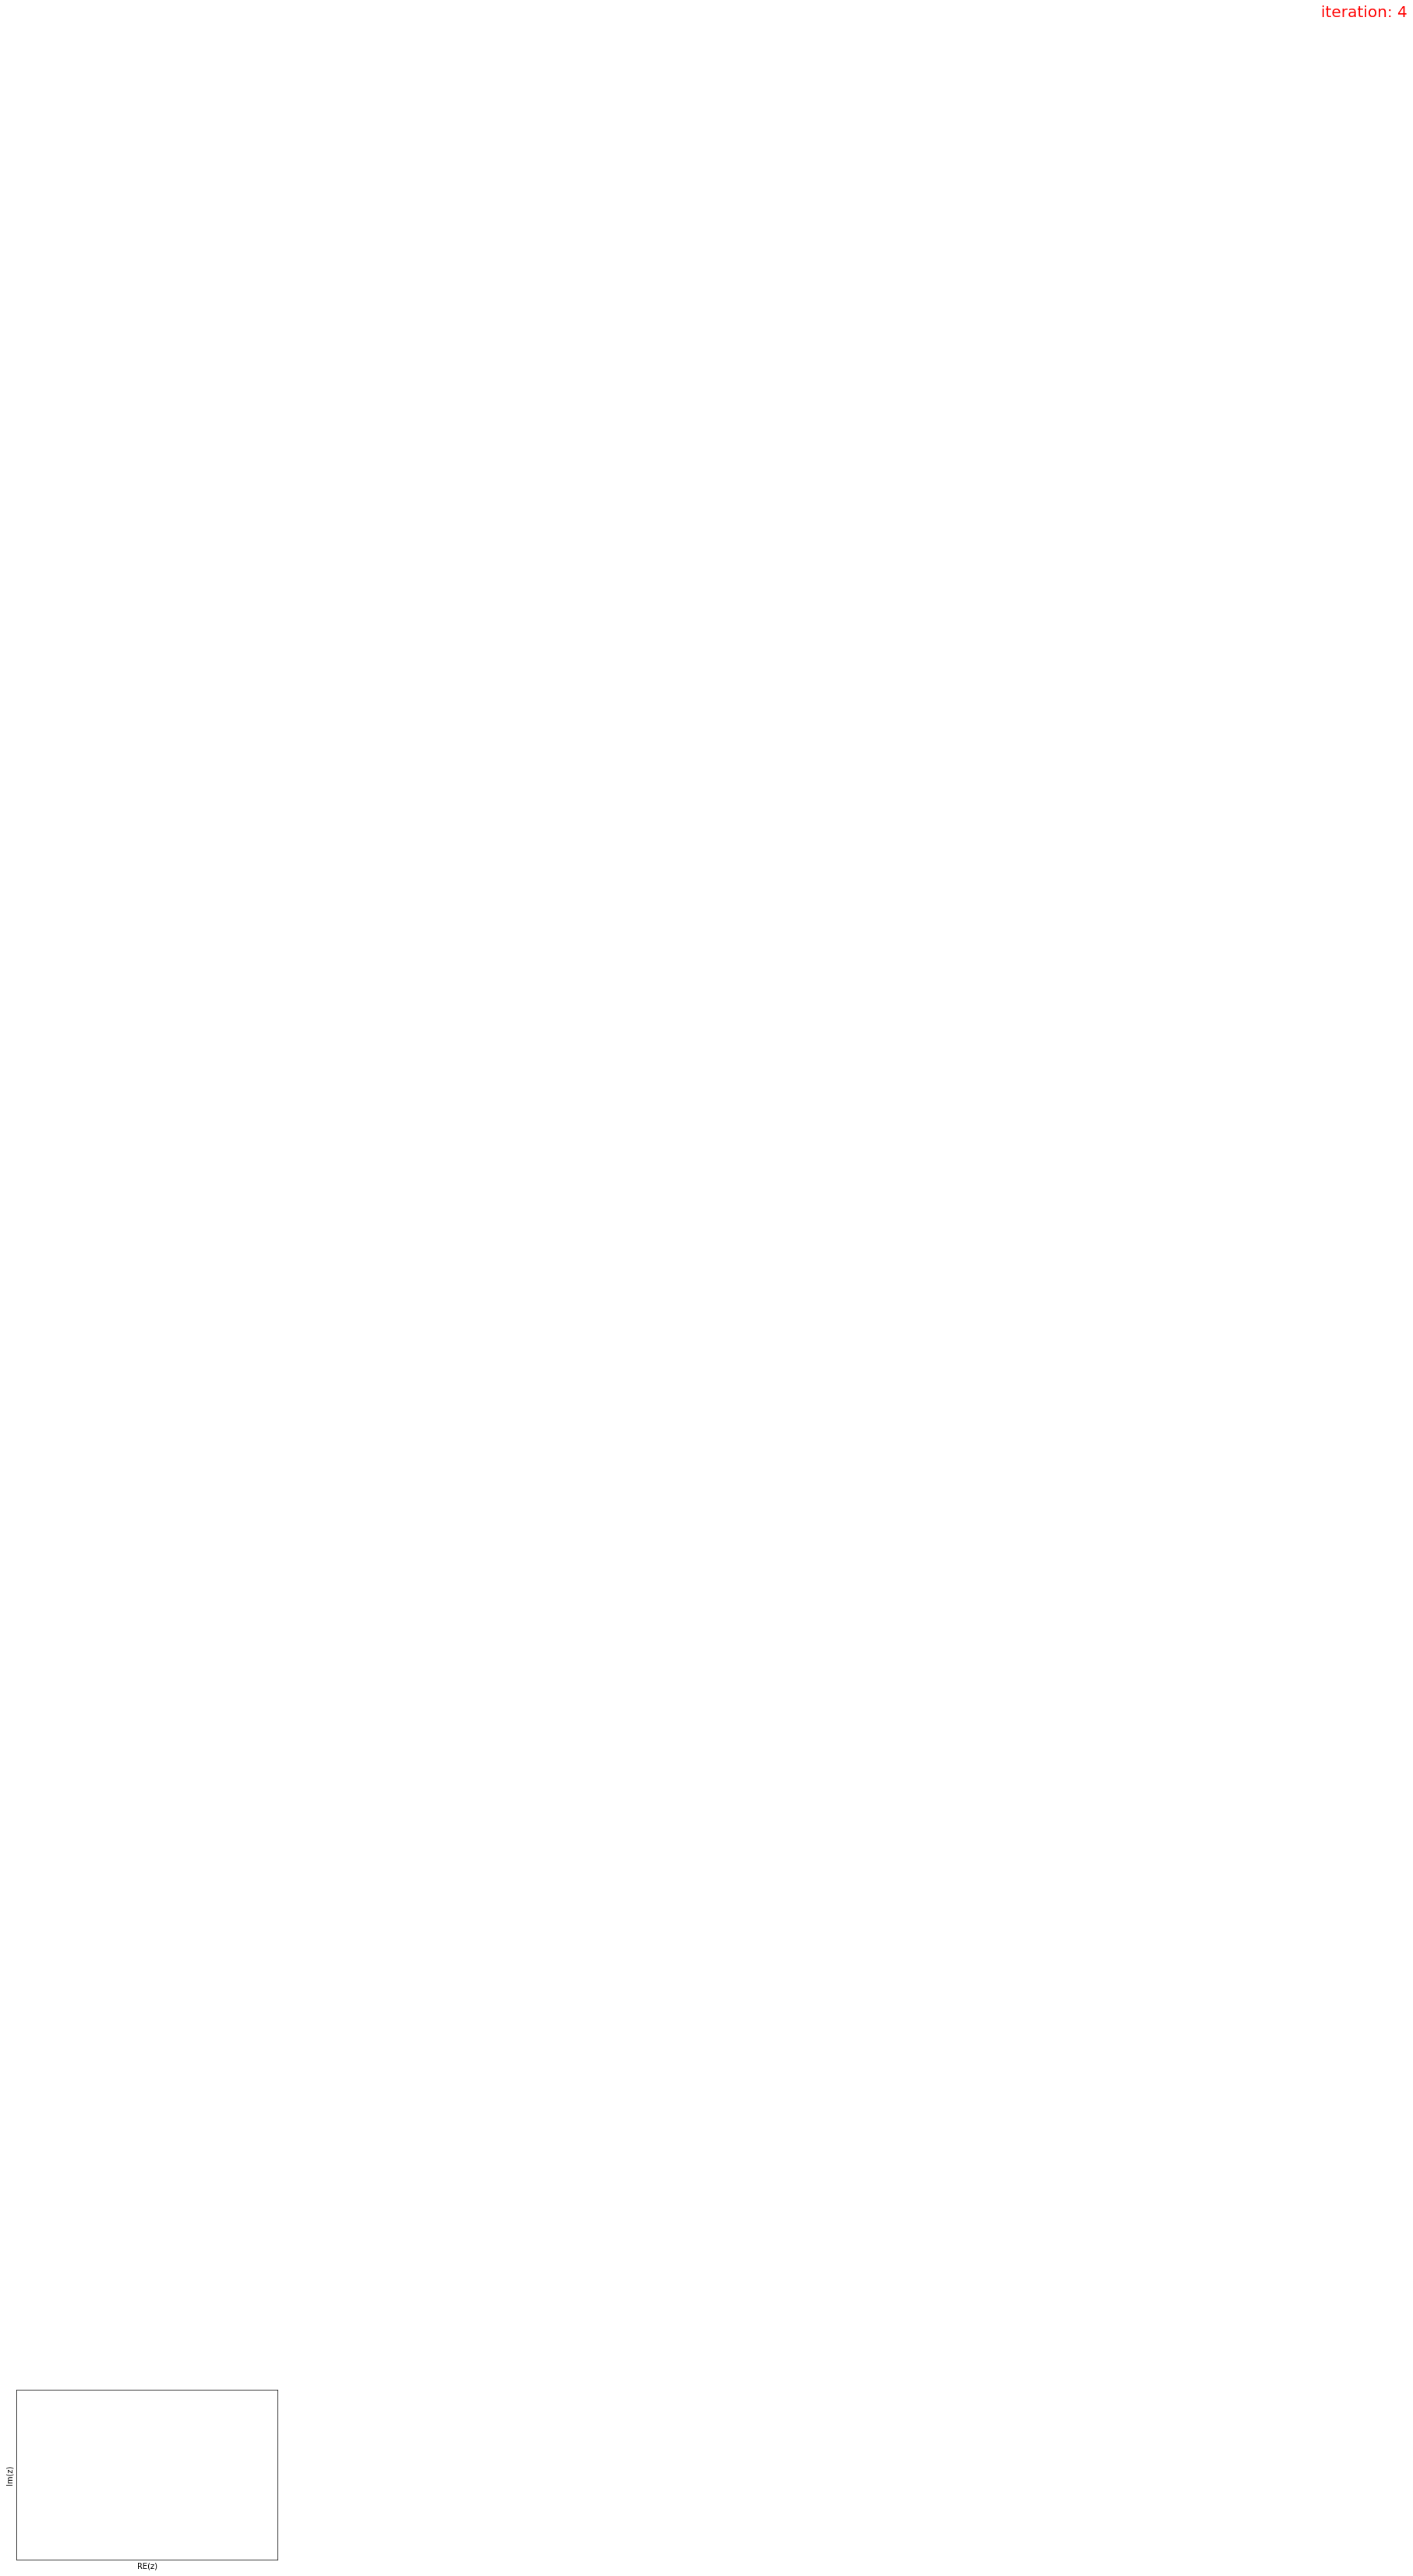

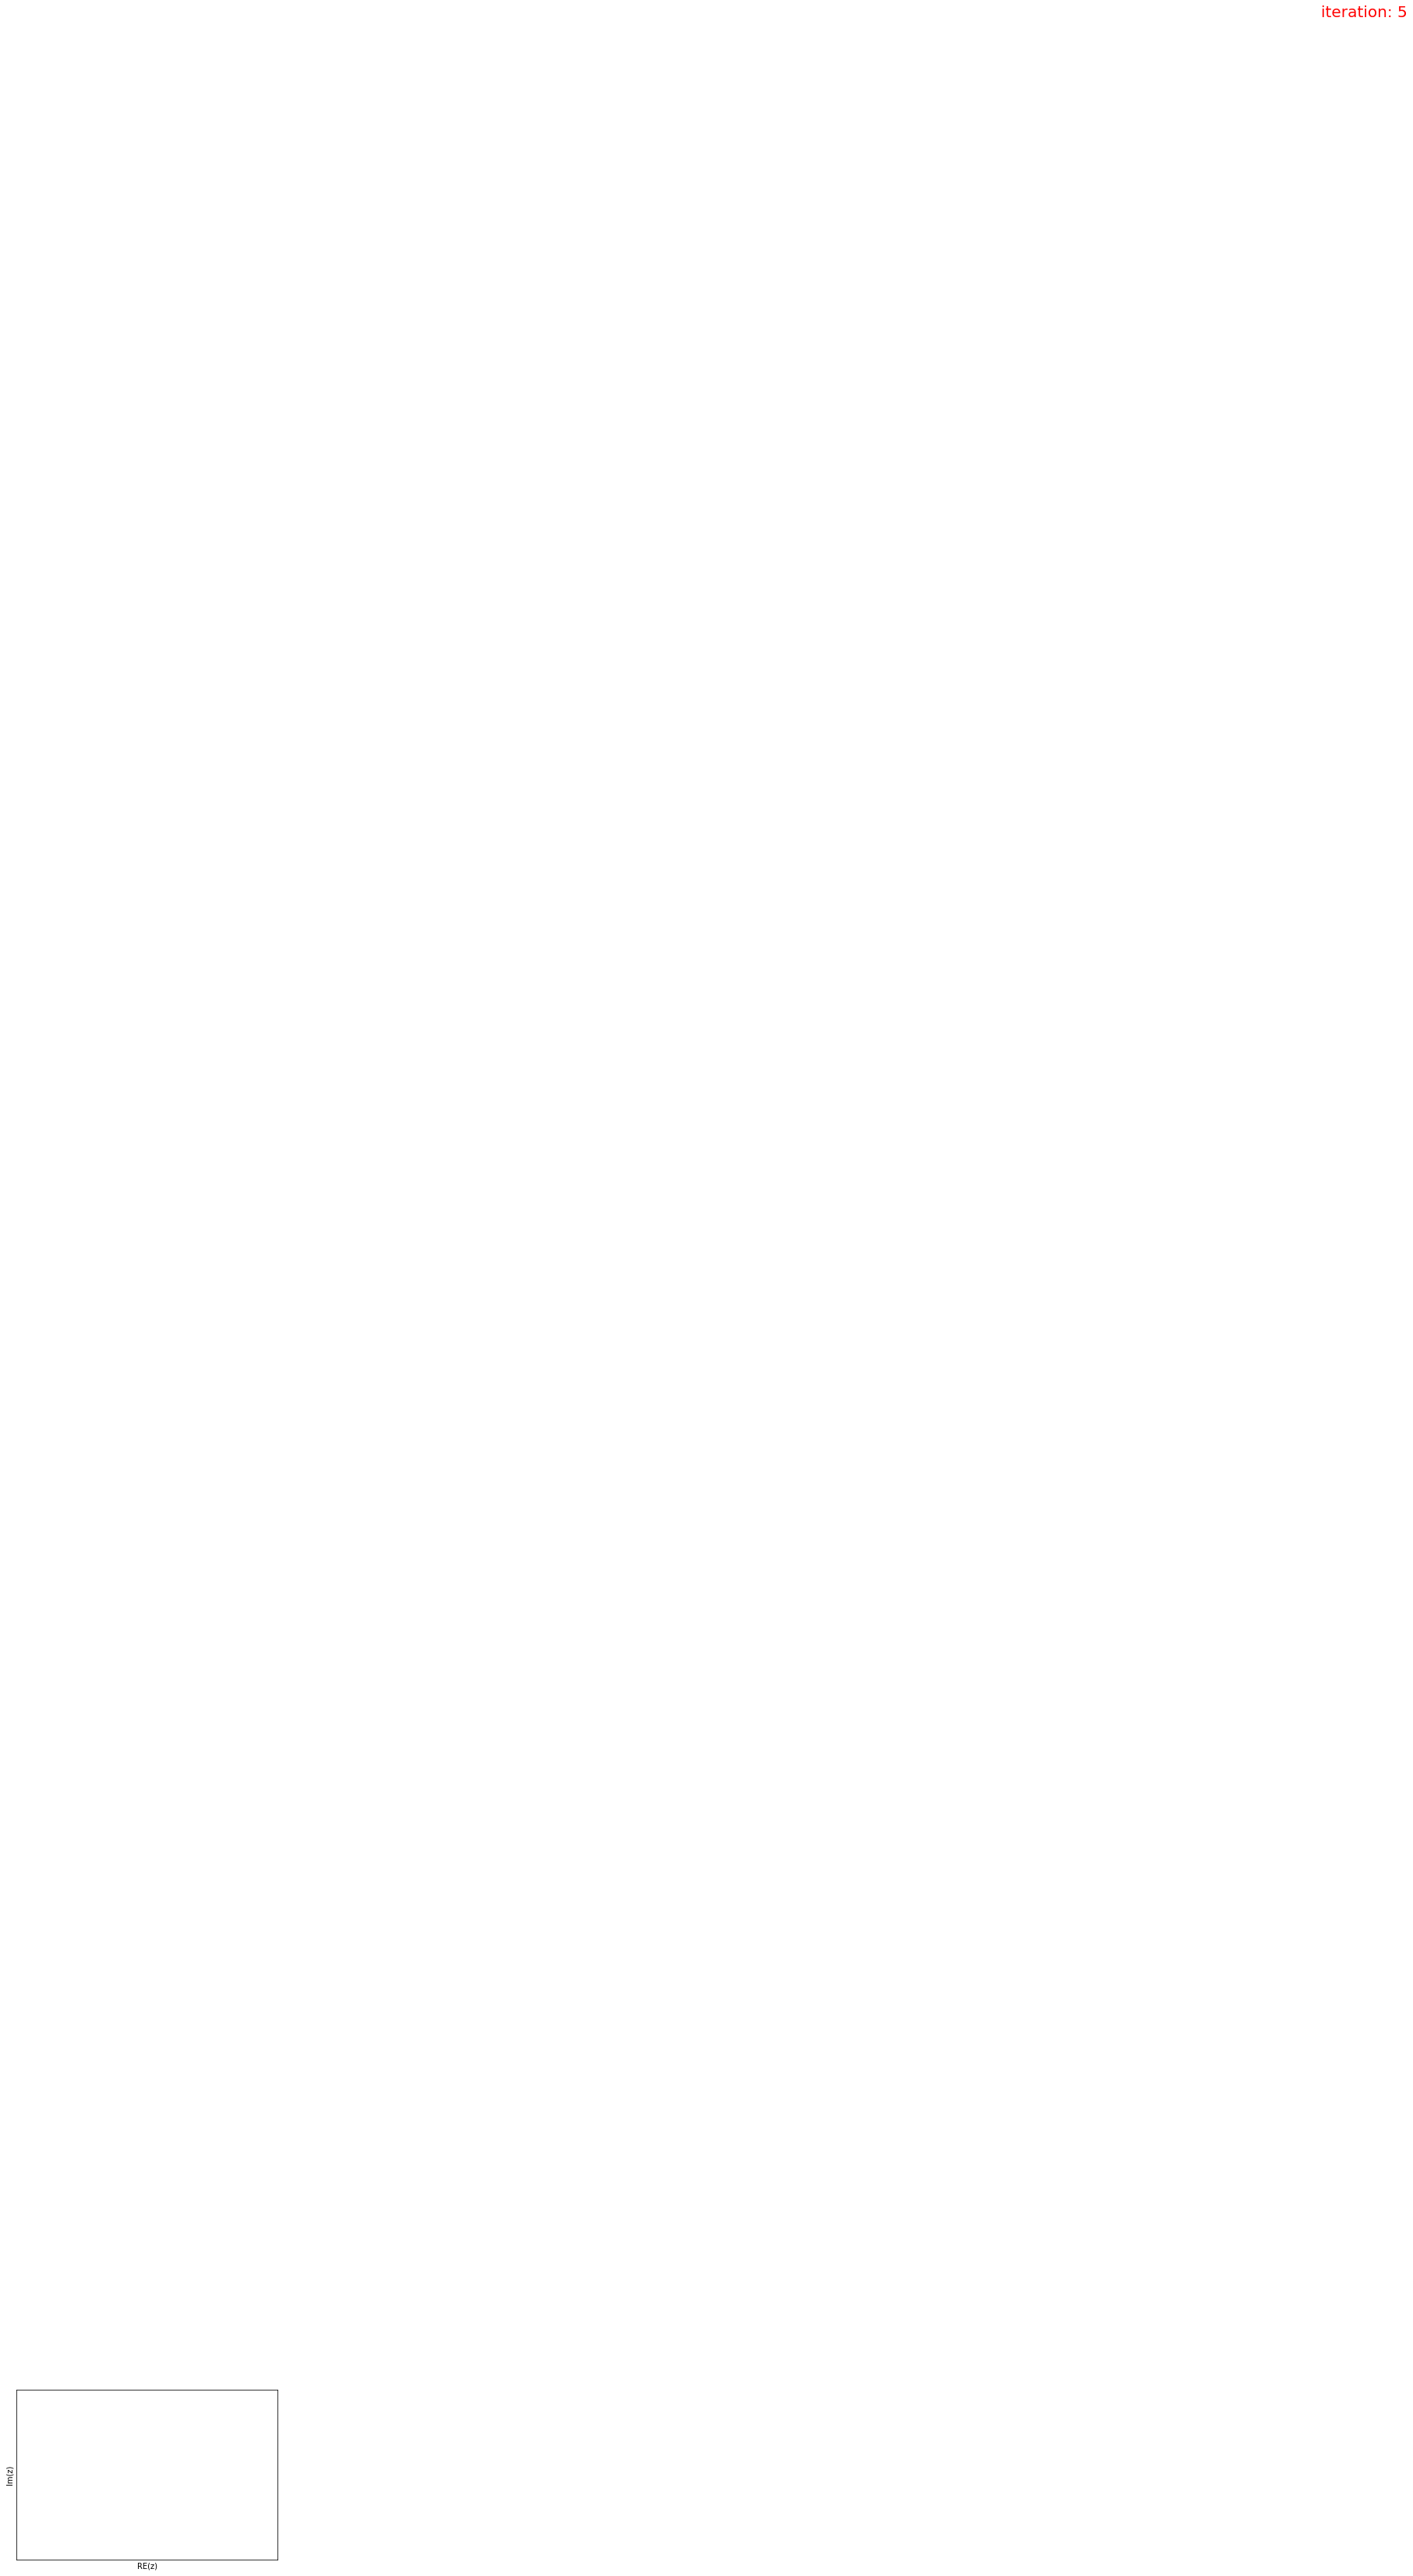

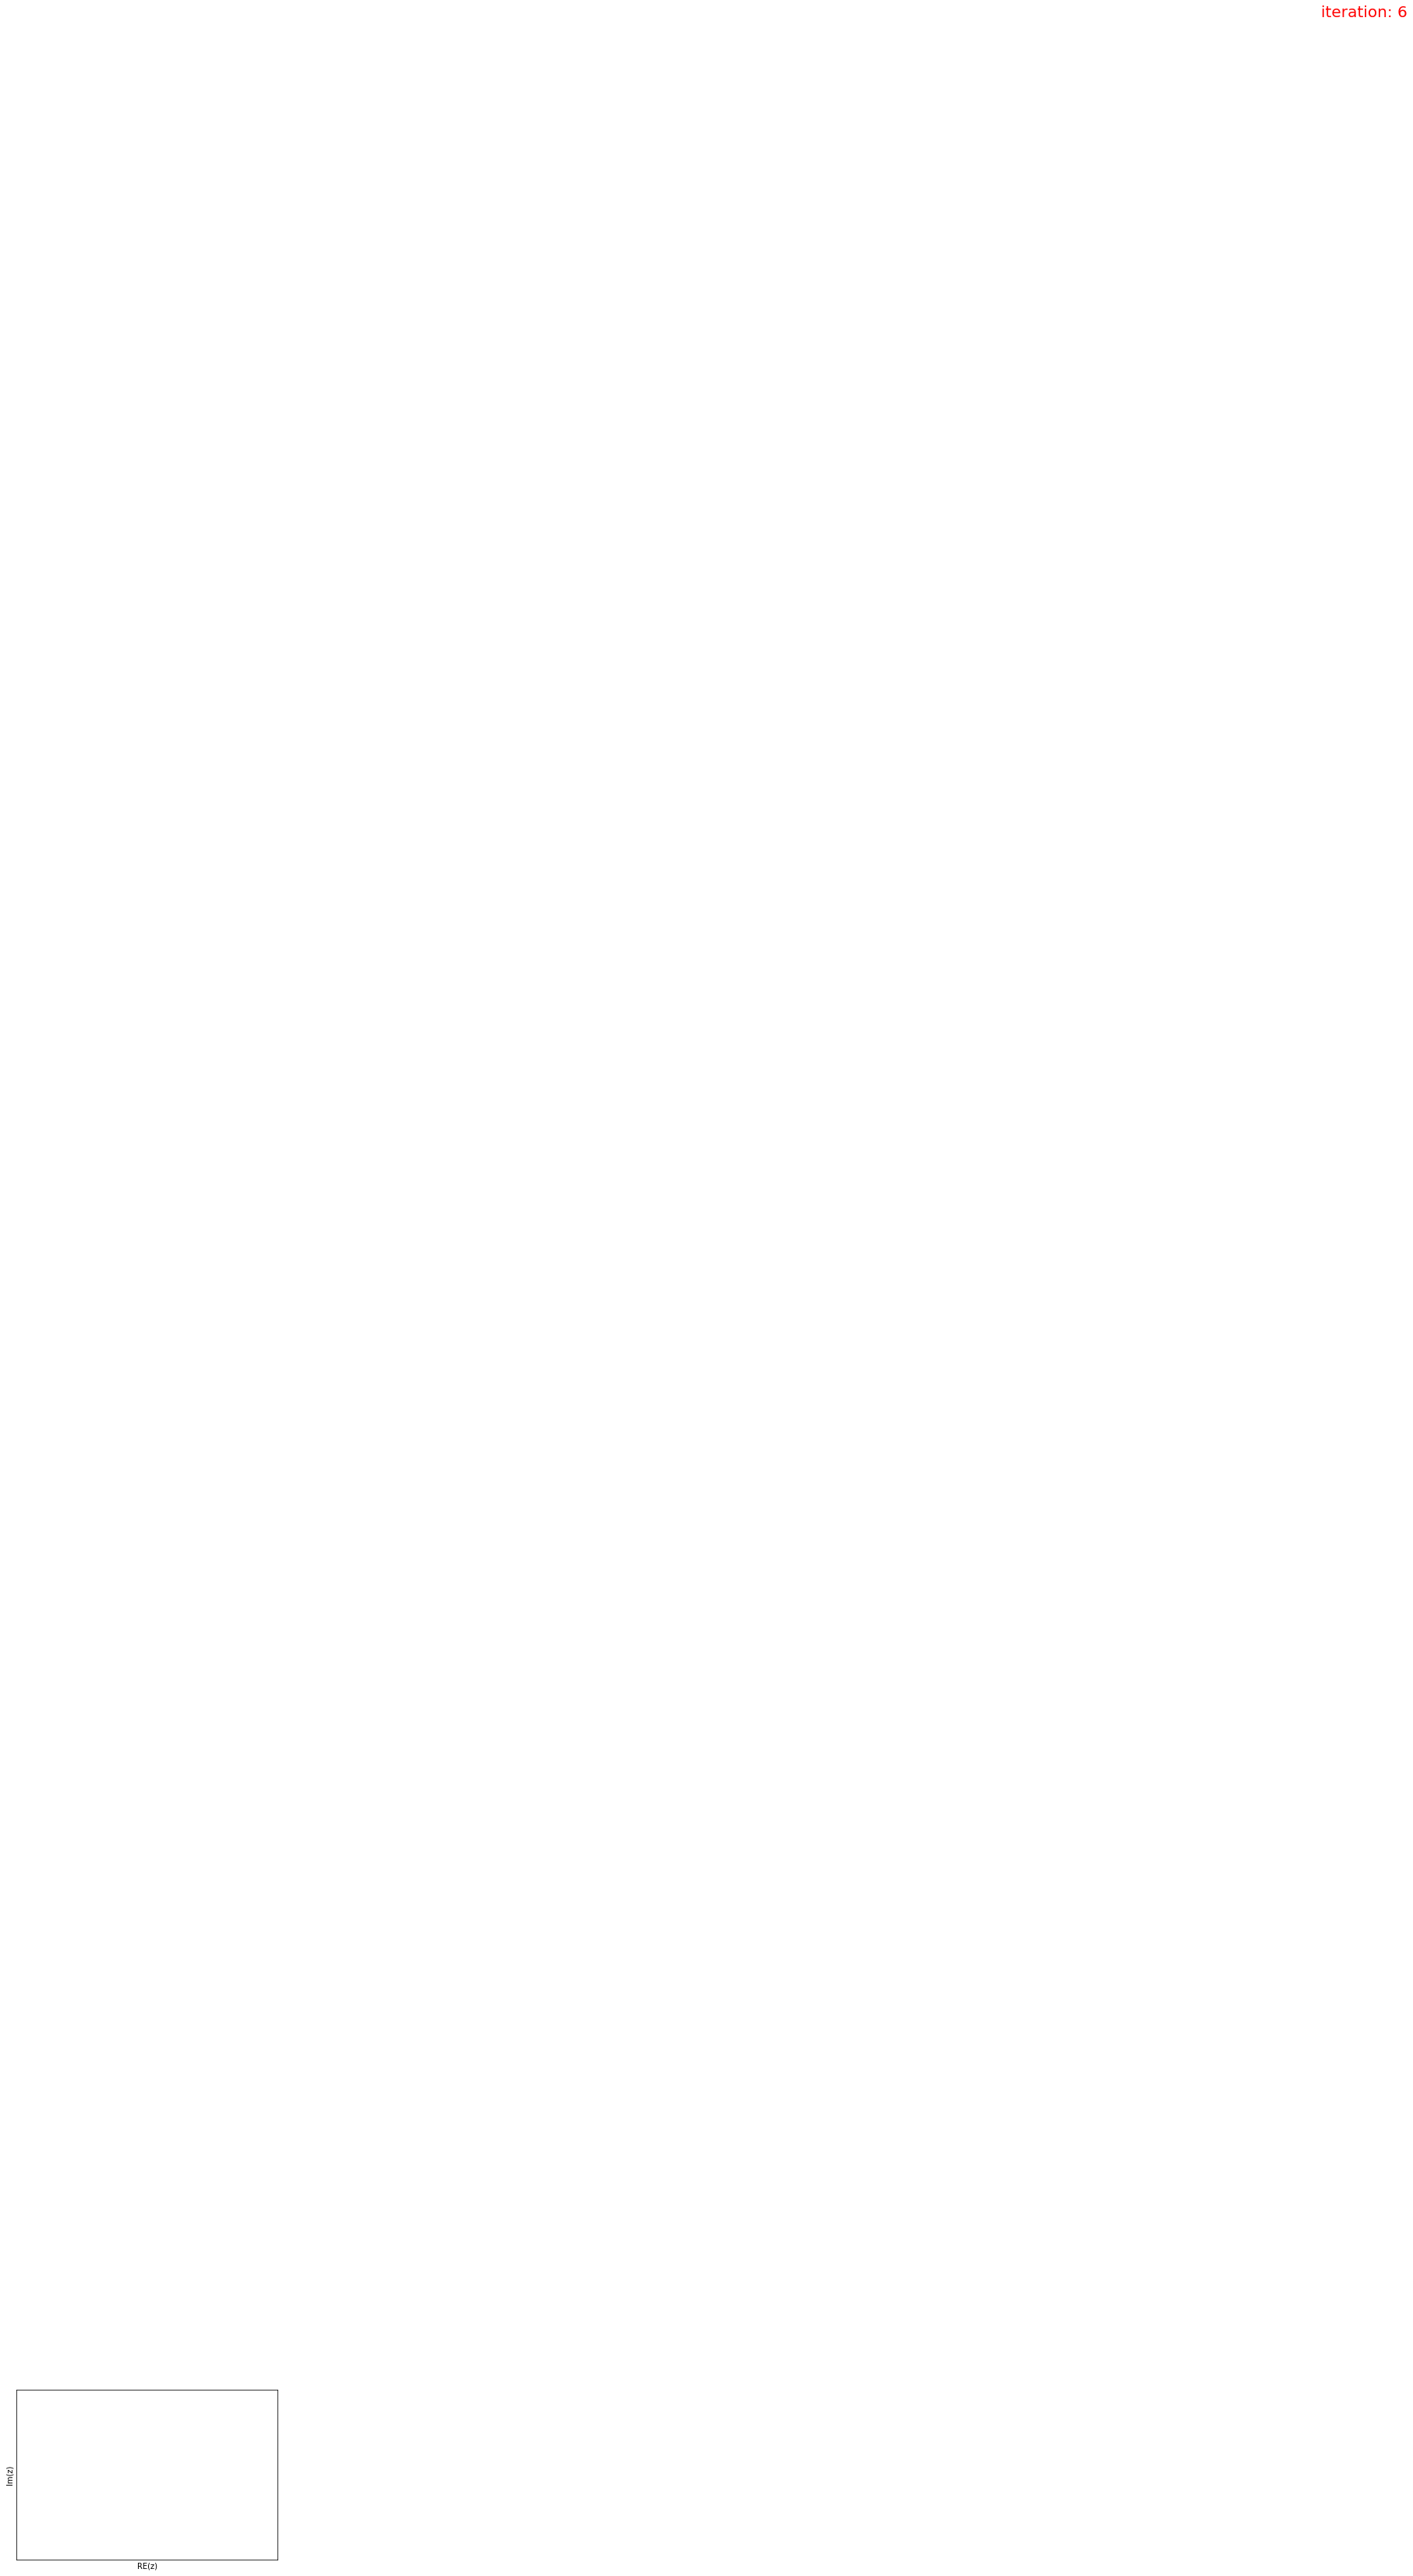

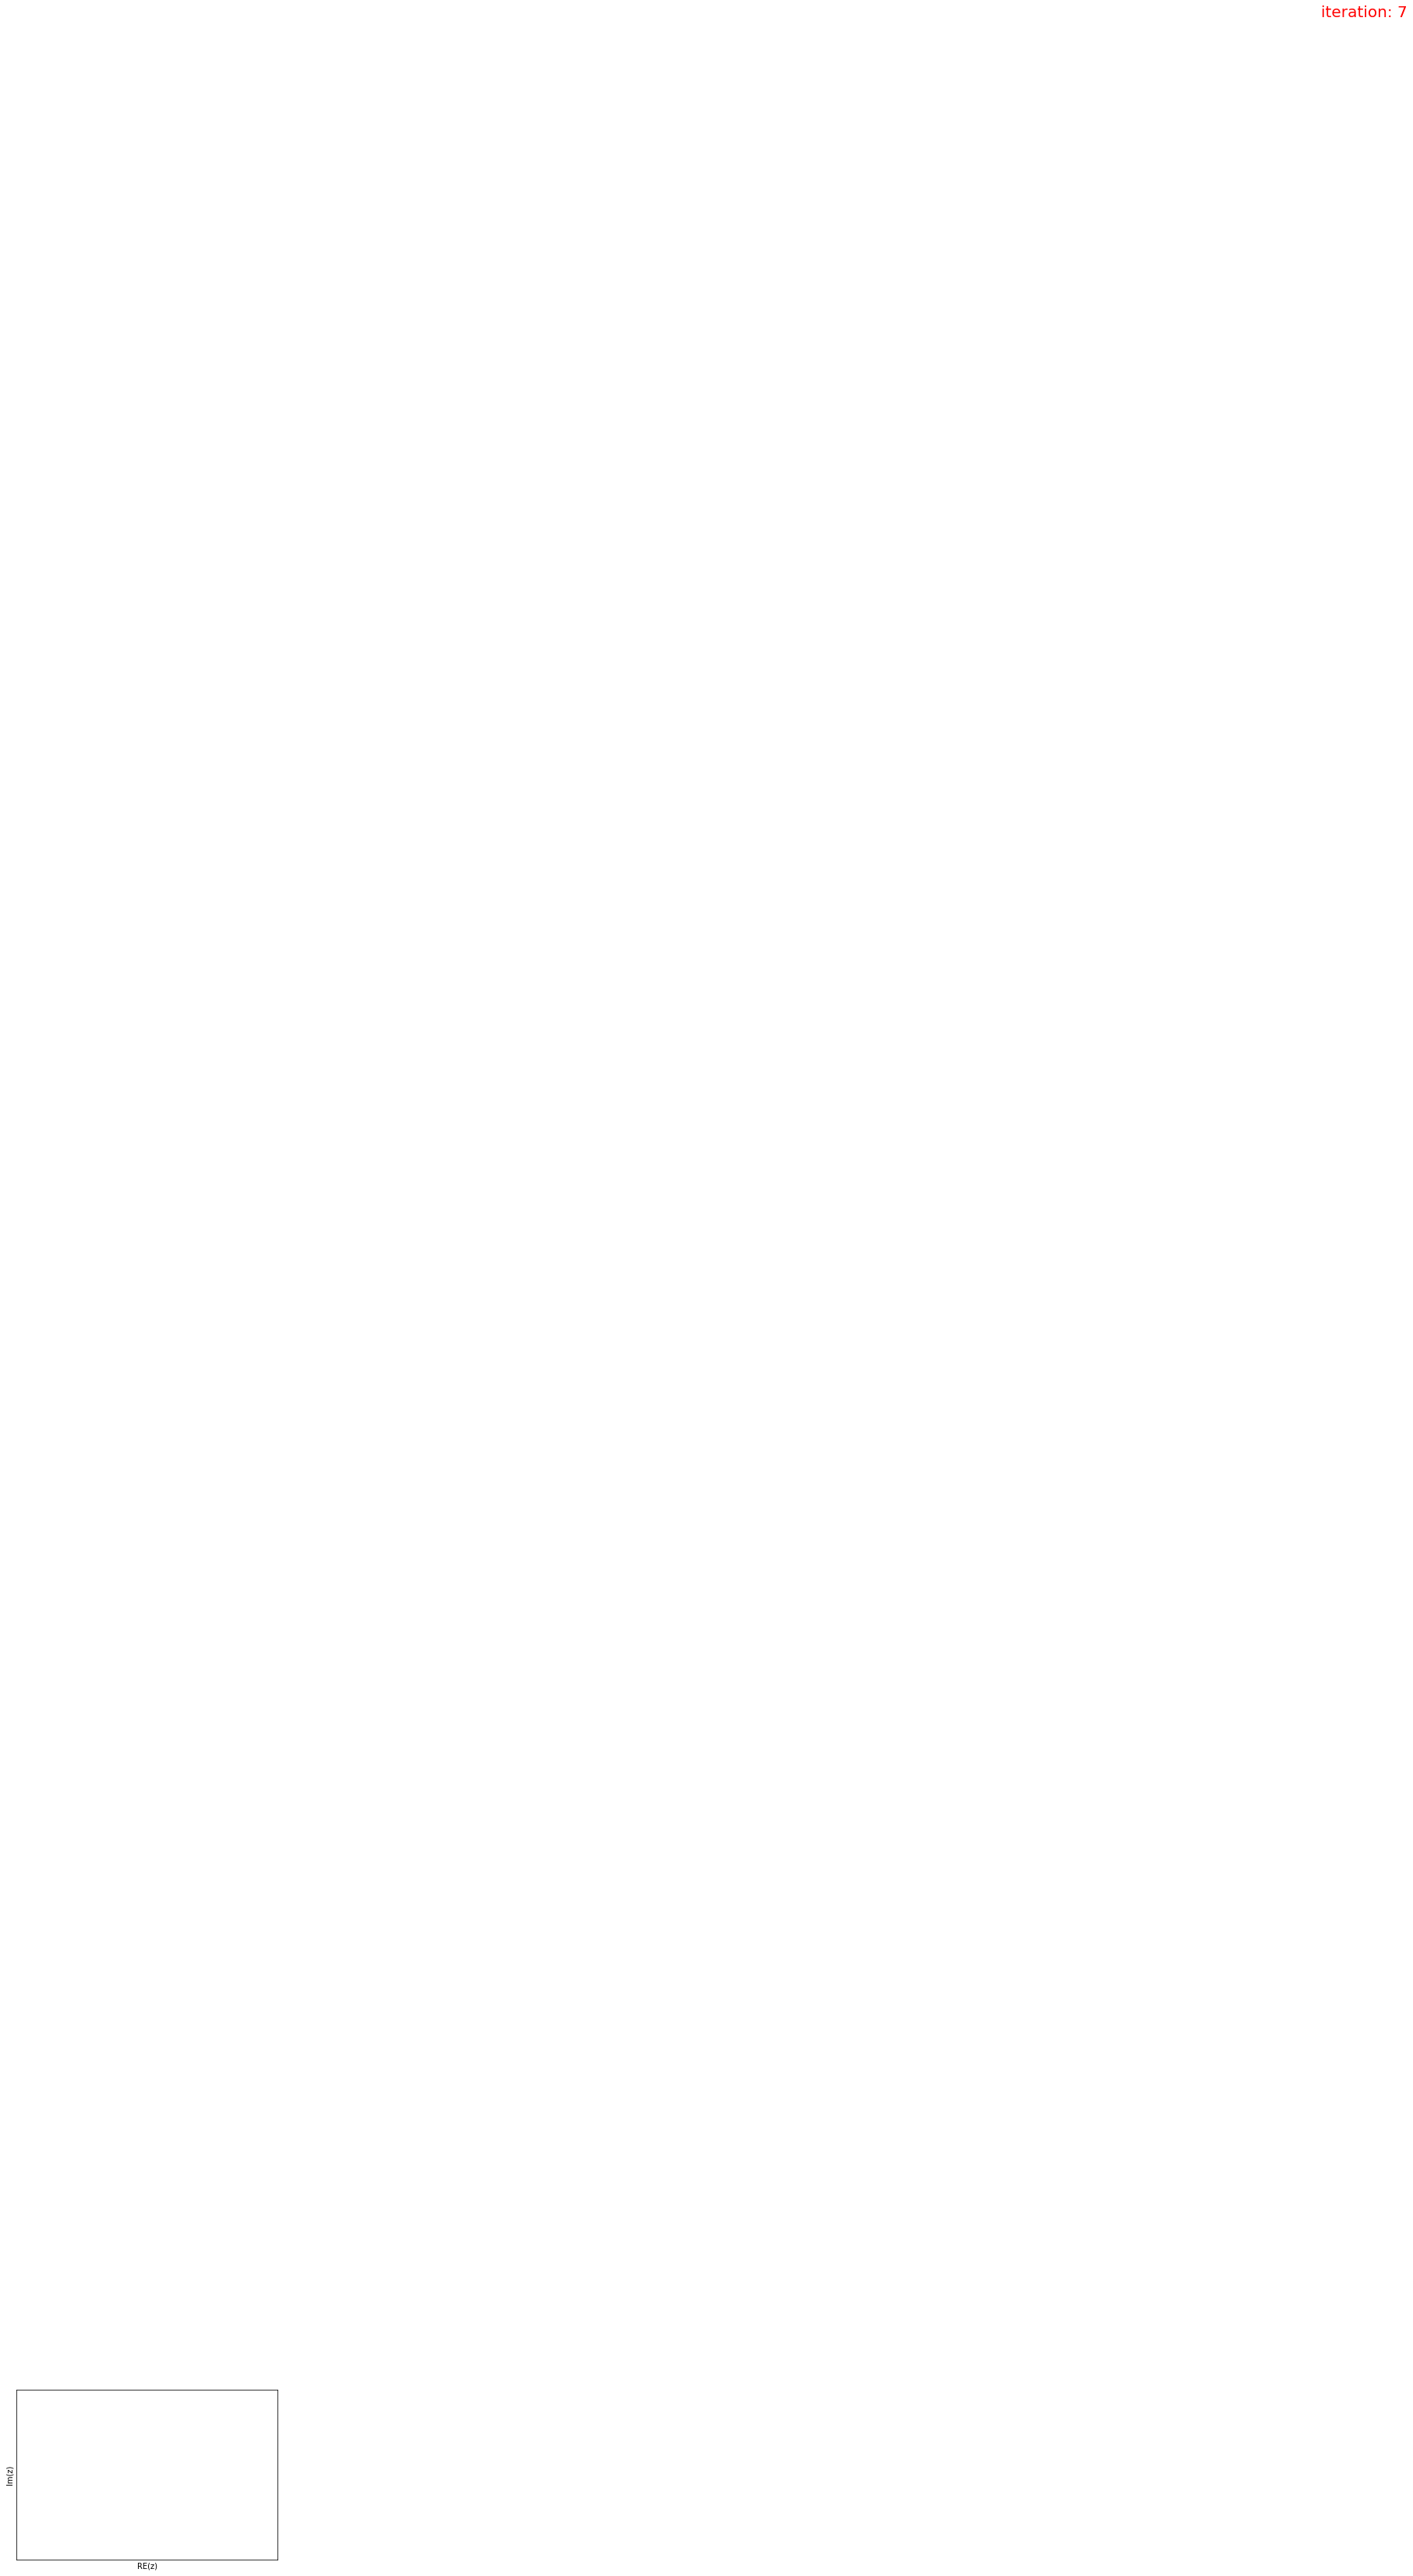

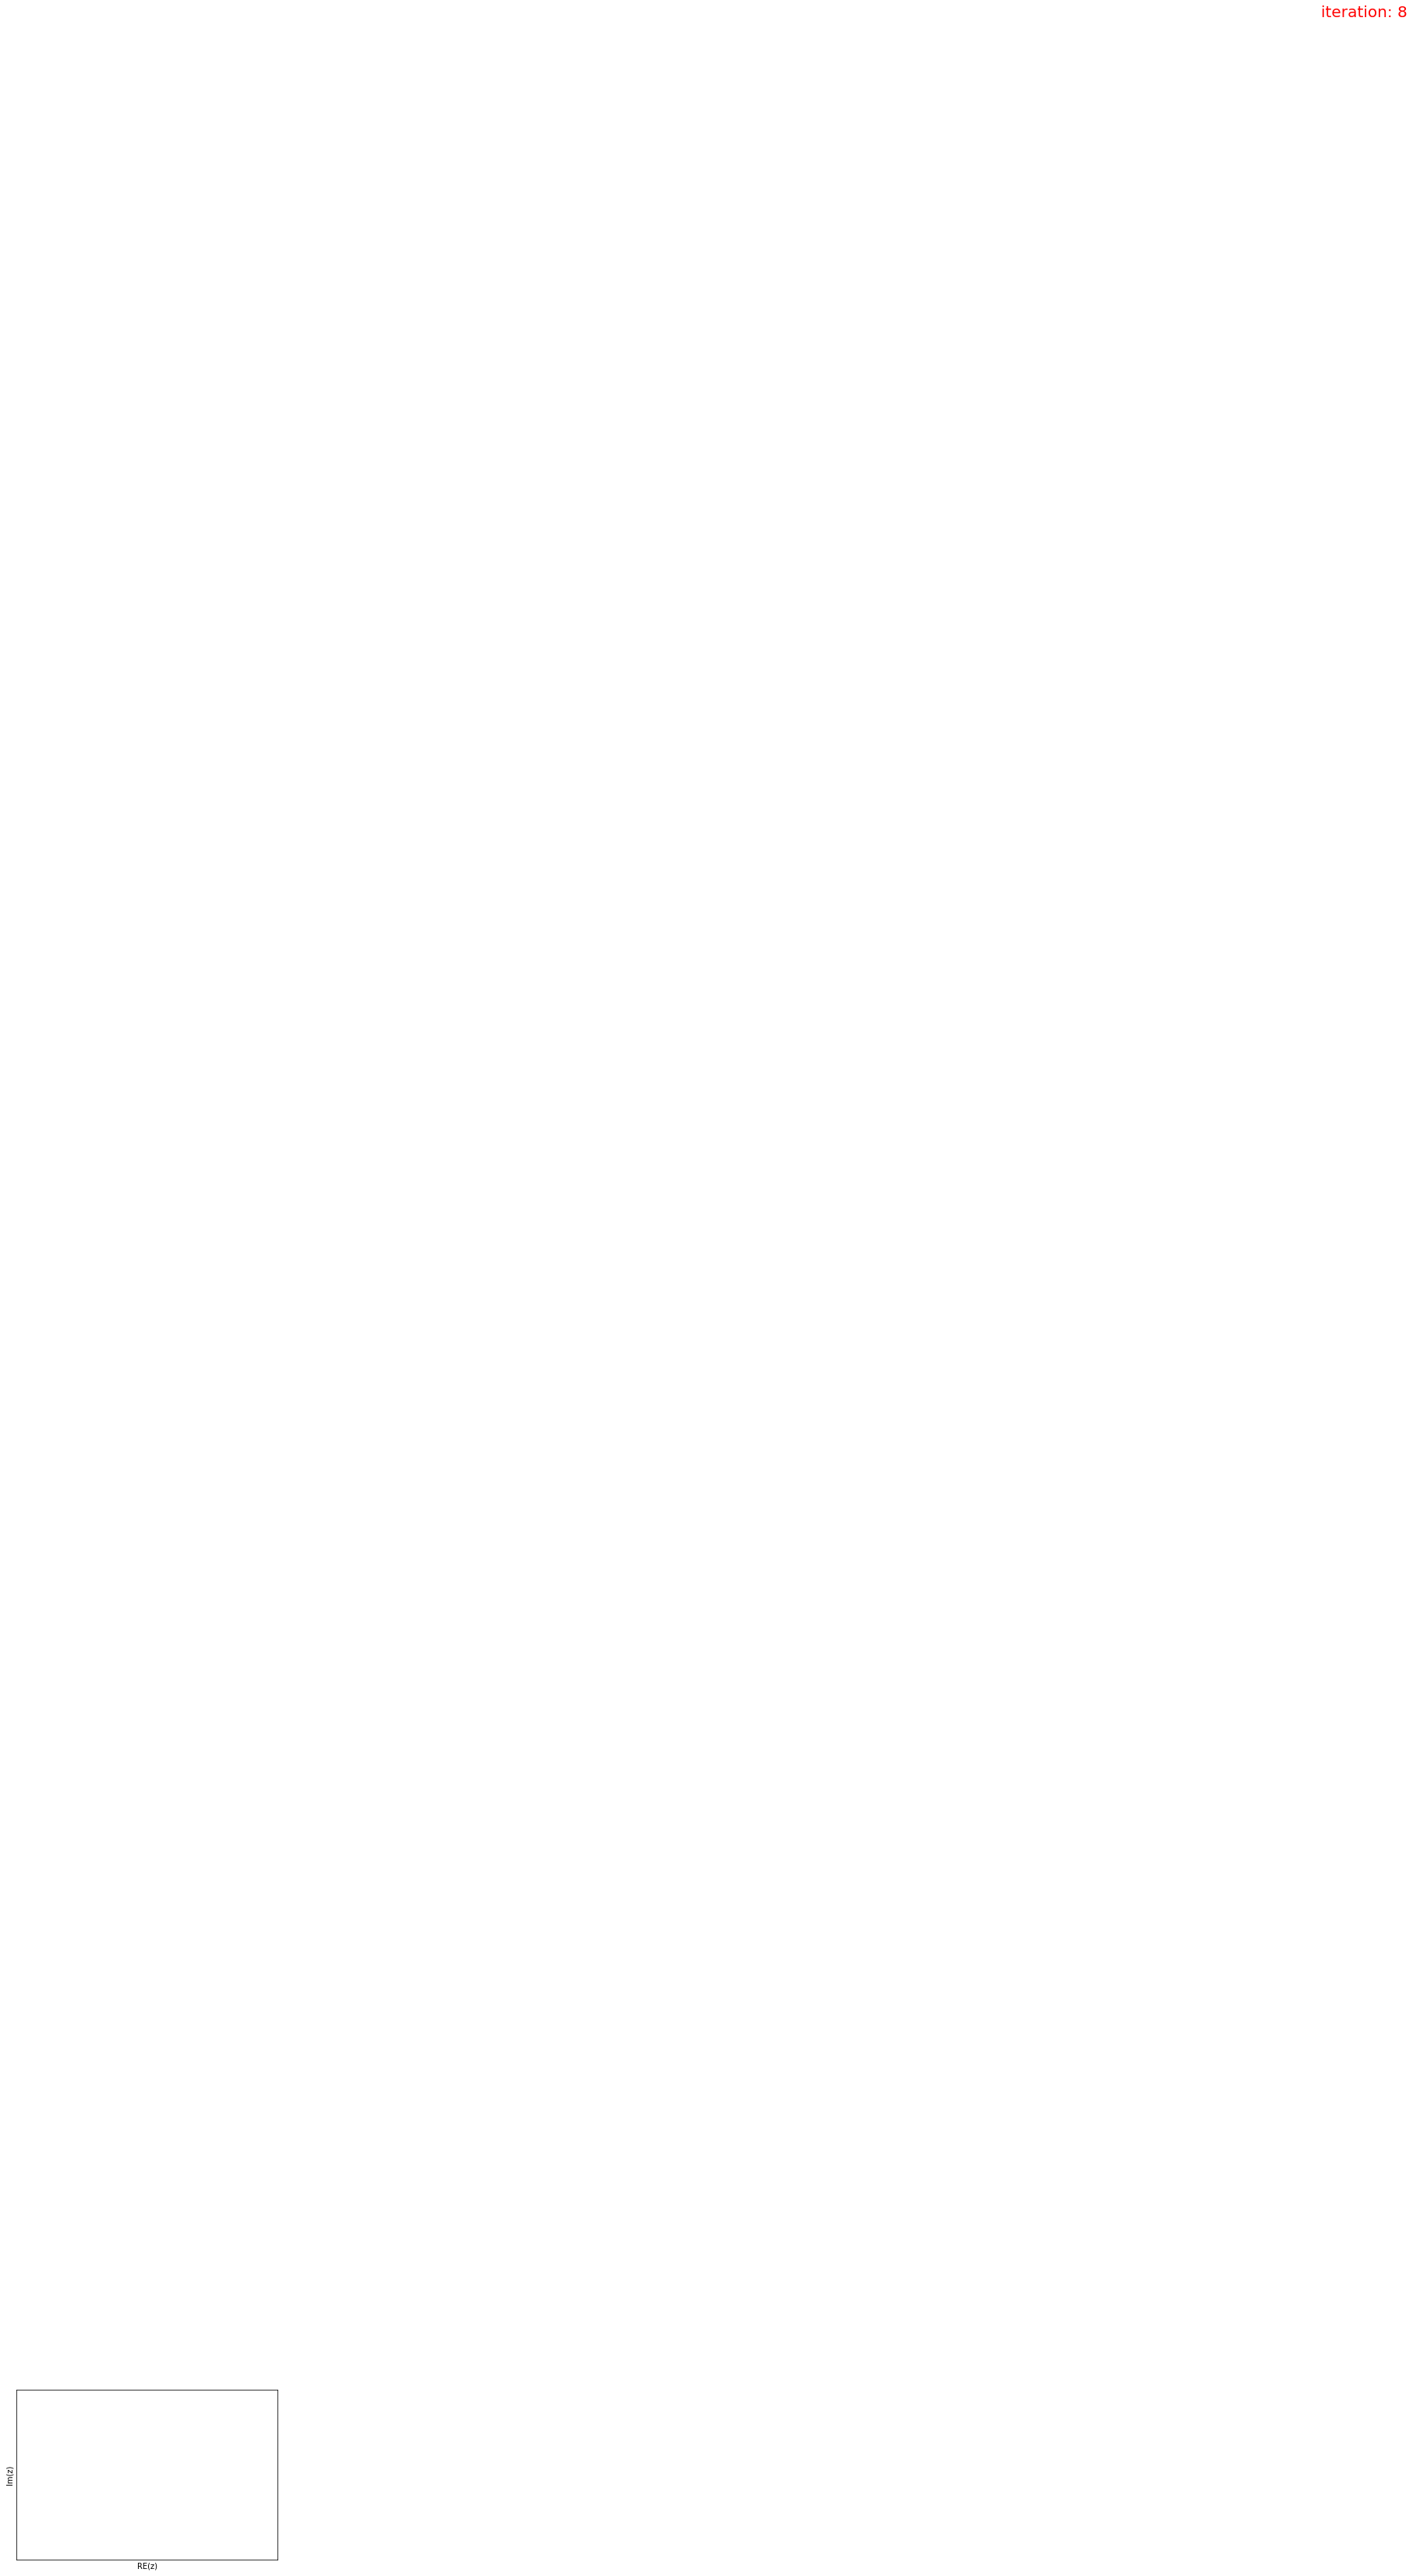

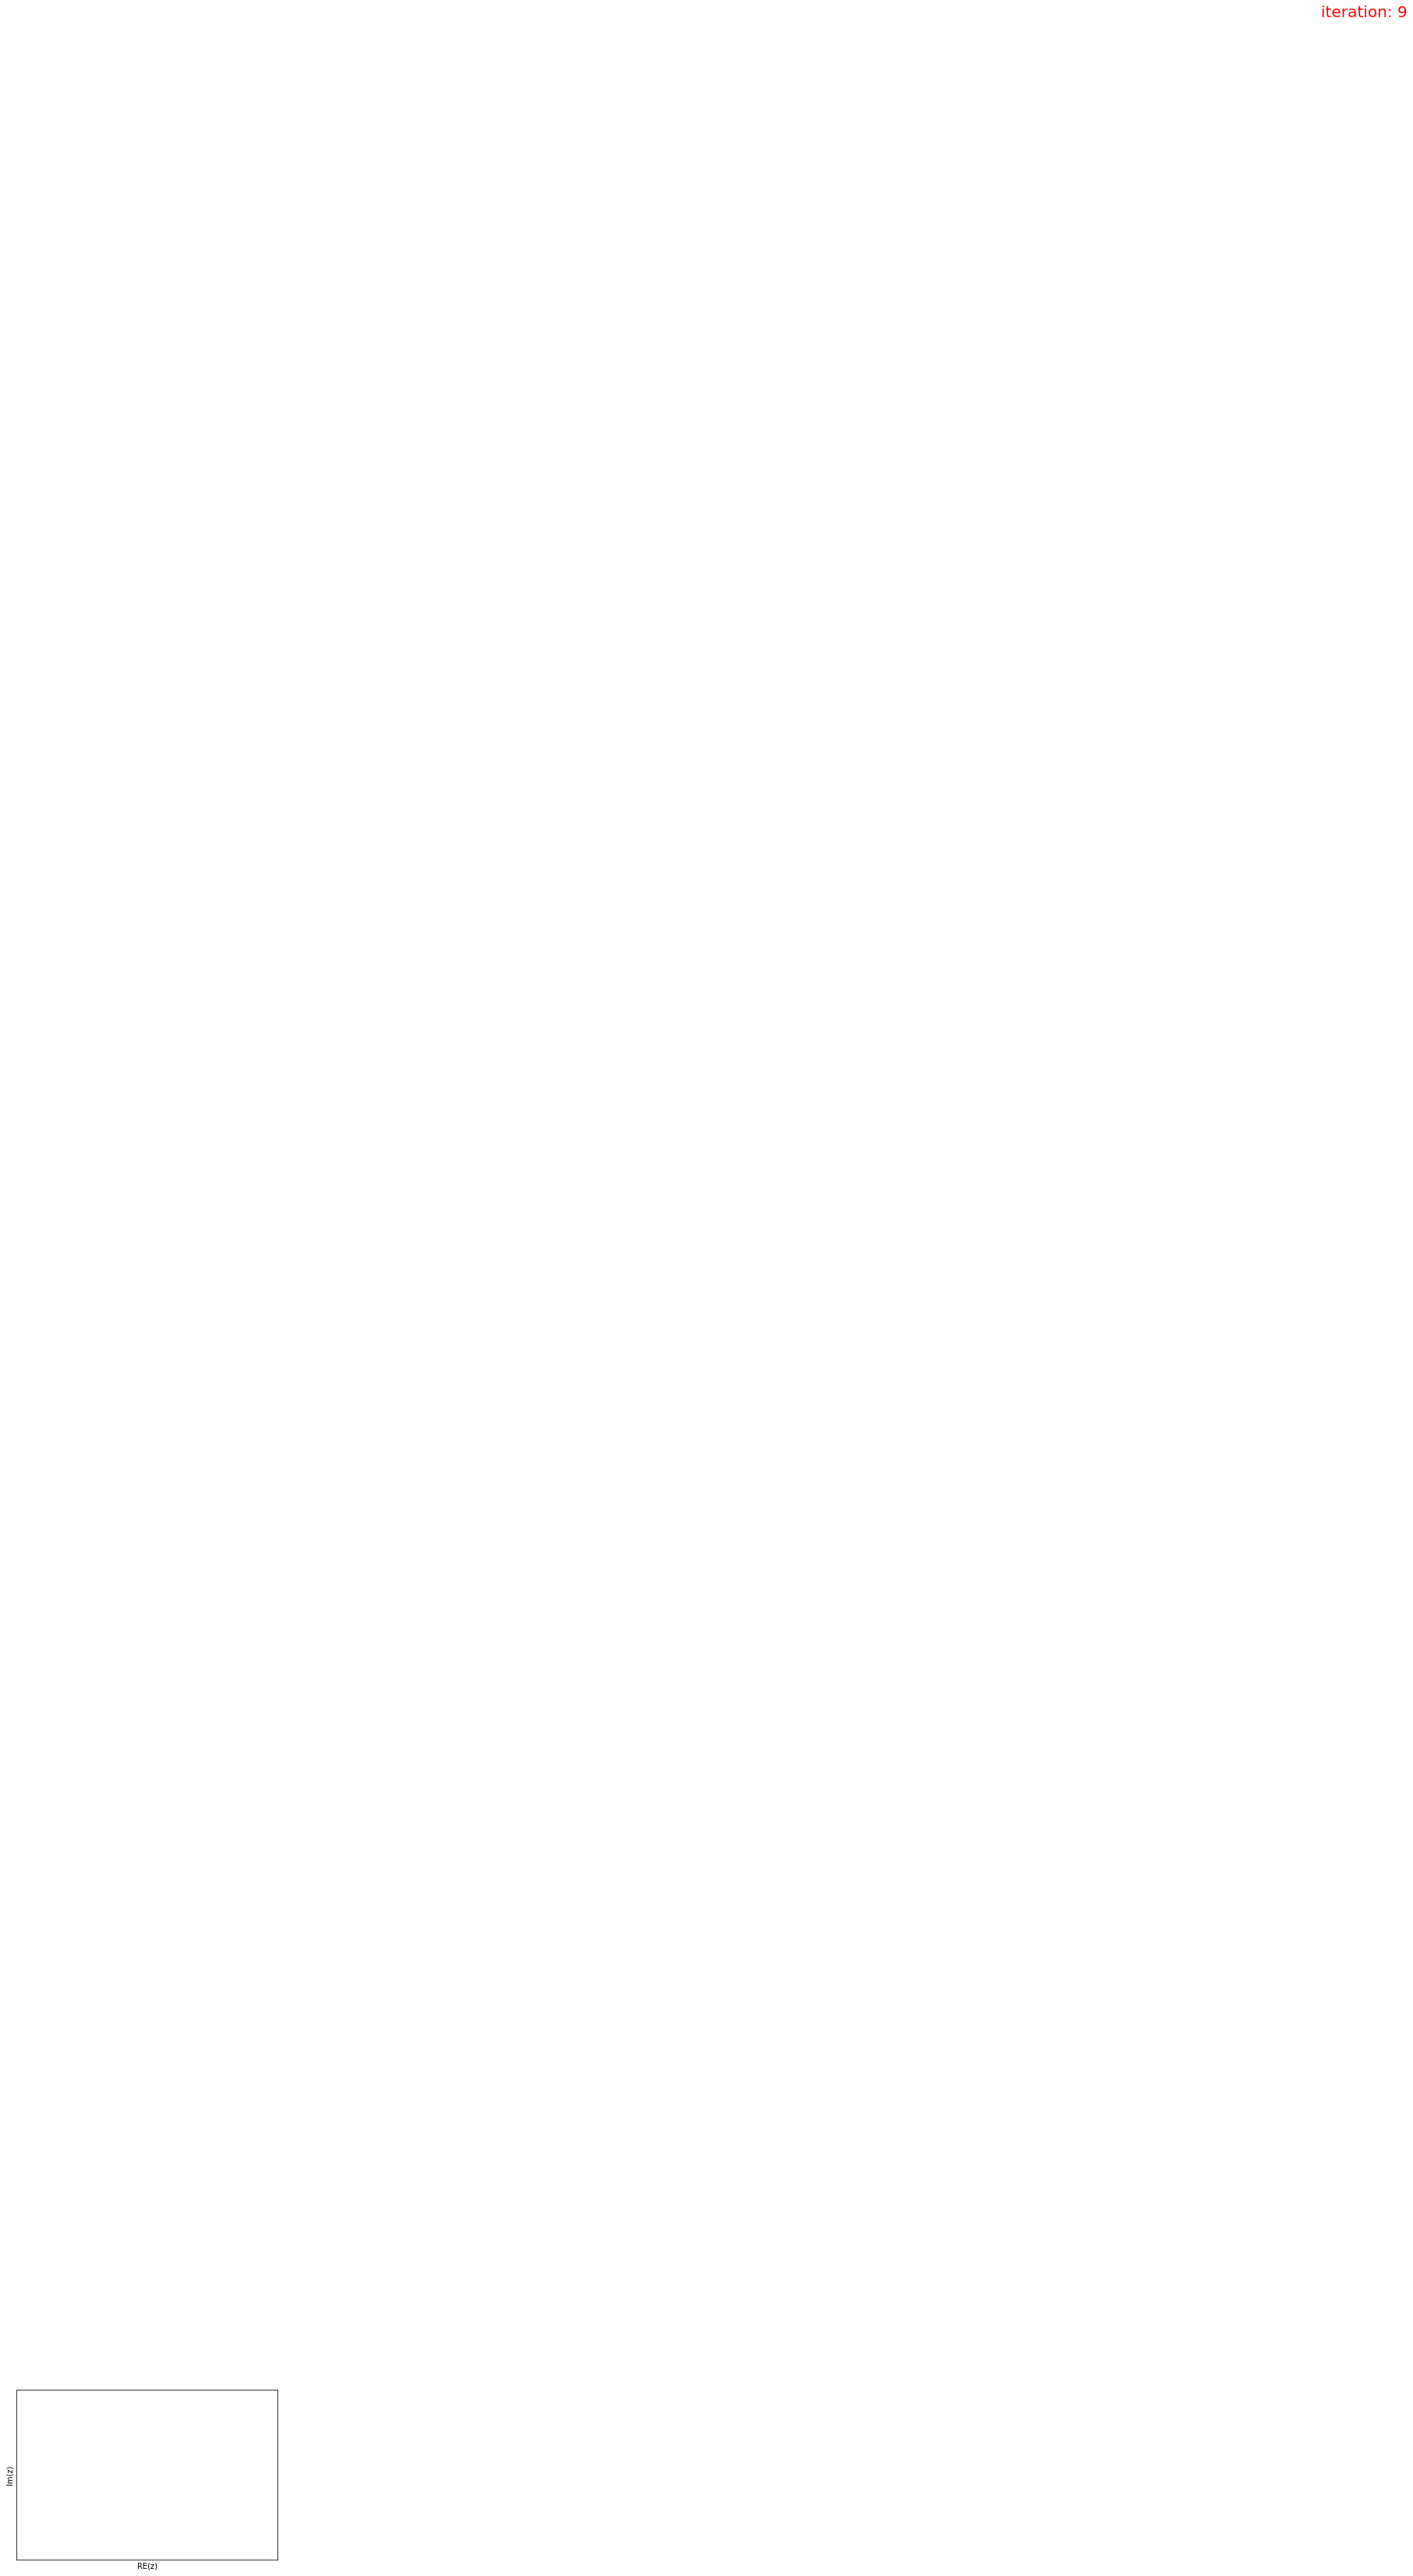

In [4]:
show_julia_iterations(x_size=400, y_size=400, c=complex(1, 0), iterations=10, z_max=10, fraction=2)

In [5]:
HTML('<img src="./data/julia_iterations.gif"/>')

In [31]:
def show_julia_a(x_size=400, y_size=400, k=1, iterations=100, z_max=10, fraction=2):
    img = np.zeros((y_size, x_size))
    a_set = np.linspace(0, 2 * np.pi)
    
    file_name = ('julia_a' + 
                '_k' + str(k) + 
                '_pow_' + str(fraction) +
                '_x' + str(x_size) + 
                '_y' + str(y_size))
    
    xmin, xmax = -3, 3
    ymin, ymax = -3, 3
    xwidth = xmax - xmin
    yheight = ymax - ymin

    with imageio.get_writer('./data/' + file_name + '.gif', mode='I') as writer:
        for a in a_set:
#             c=complex(k, a)
            c = cmath.exp(k+a*1j)
            for x in range(x_size):
                for y in range(y_size):
                    z = complex(x / x_size * xwidth + xmin, y / y_size * yheight + ymin)
                    iter_num = 0

                    while abs(z) <= z_max and iter_num < iterations:
                        z = z**fraction + c
                        iter_num += 1

                    img[x, y] = iter_num
    
            fig, ax = plt.subplots(figsize=(14, 11))
            plt.ioff()
            ax.set_xlabel('RE(z)')
            ax.set_ylabel('Im(z)')
            plt.text(5, 15, 'a: ' + str(a), fontsize=20, color='red')

            plt.axis('off')
            plt.imsave('./data/' + file_name + '.jpg', img, cmap=cm.binary)
            plt.close(fig)
            writer.append_data(imageio.imread('./data/' + file_name + '.jpg'))
    
    return './data/' + file_name + '.gif'

In [33]:
%%time
HTML('<img src="' + 
     show_julia_a(x_size=400, y_size=400, k=0.7885, iterations=100, z_max=10, fraction=2) +
     '"/>')

CPU times: user 36.8 s, sys: 500 ms, total: 37.3 s
Wall time: 9.63 s


In [32]:
%%time
HTML('<img src="' + 
     show_julia_a(x_size=400, y_size=400, k=0, iterations=100, z_max=10, fraction=2) +
     '"/>')

CPU times: user 39.2 s, sys: 559 ms, total: 39.7 s
Wall time: 10.8 s


In [61]:
def show_julia_count_converges(x_size, y_size, c, iterations, z_max=10, fraction=2):
    img = np.zeros((y_size, x_size))

    # abs(z) < 2
    xmin, xmax = -2, 2
    ymin, ymax = -2, 2
    xwidth = xmax - xmin
    yheight = ymax - ymin

    for x in range(x_size):
        for y in range(y_size):
            z = complex(x / x_size * xwidth + xmin, y / y_size * yheight + ymin)
            iter_num = 0
            z_arr = []

            while abs(z) <= z_max and iter_num < iterations:
                z = z**fraction + c
                iter_num += 1
                z_arr.append(z)

            z_arr = set(z_arr)
            z_arr = [c.real for c in z_arr]
            z_value = len(z_arr)
            img[x, y] = z_value
#             img[x, y] = (z_value / max(z_arr)) * 255

    fig, ax = plt.subplots(figsize=(14, 11))
    ax.set_xlabel('RE(z)')
    ax.set_ylabel('Im(z)')

    ax.set_xticks([int(i / 4 * x_size) for i in np.arange(-2, 2, 8)])
    ax.set_yticks([int(i / 4 * y_size) for i in np.arange(-2, 2, 8)])

    ax.set_xticklabels(np.arange(-2, 2, 8))
    ax.set_yticklabels(np.arange(-2, 2, 8))

    ax.imshow(img, cmap=cm.hot)
#     print(set(np.ravel(img)))
#     ax.imshow(img, cmap=cm.binary)


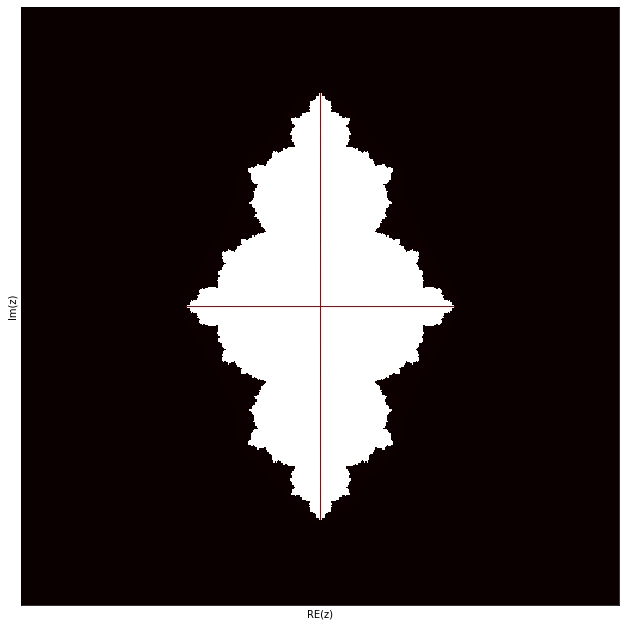

In [62]:
show_julia_count_converges(x_size=500, y_size=500, c=1-1.61803398, iterations=1000, z_max=10, fraction=2)

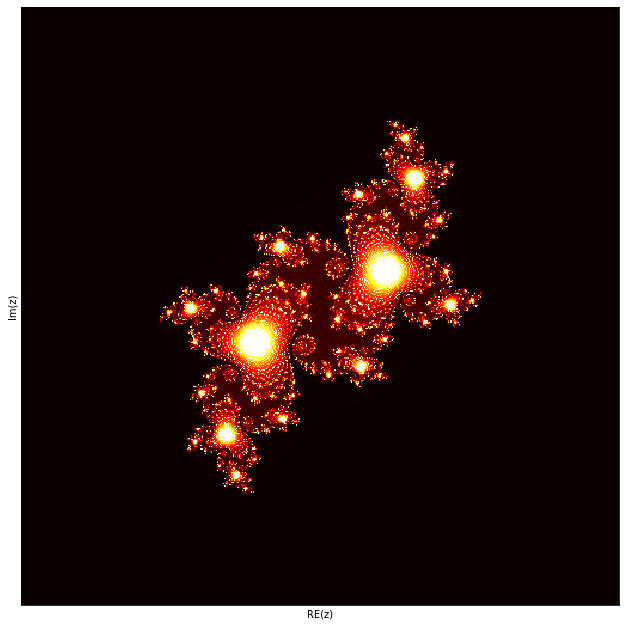

In [63]:
show_julia_count_converges(x_size=500, y_size=500, c=complex(-0.1, 0.65), iterations=1000, z_max=10, fraction=2)